In [187]:
import pandas as pd

#Read Excel file and get insight
df12 = pd.read_excel('COOP4230_DS_PROJECT_DATA_12.xlsx', engine='openpyxl')
df12.head(5)

,PeriodOrder,CustomerId,ValueBasedSegment,ProfitSegment,YearlyIncome,AvgUsdAumL3M,AvgUsdAumL6M,SumUsdAum,MaxUsdAumL24M,AvgDemandDepositTrxUsdAmountL6M,...,AvgBranchTrxNumL6M,SumBranchTrxNumLM,SumCcIvrTrxNumL3M,SumCcIvrTrxNumL6M,SumDemandDepositTrxNumL3M,SumDemandDepositTrxNumL6M,BonusCampaignPromiseFlag,ClosedCreditCardFlag,ValidationFlag,ChurnFlag
0,12,6B93AE32-CC94-4225-93A6-4B4E4FE3ED38,X,D,0.0,0,0,0.0,50.0,0,...,0.28,NaN,0,0,0.0,0.0,0,0,0,0.0
1,12,23F308B0-0A29-4FC7-A4BB-FFAB461643EC,X,D,150.0,340,310,400.0,750.0,1370,...,0,NaN,0,0,2.0,2.0,0,0,0,0.0
2,12,14C523CD-12D8-435B-8BB3-10DB40C3EAA1,X,D,10.0,10,10,0.0,140.0,1040,...,0.55,NaN,0,0,4.0,8.0,0,0,0,0.0
3,12,35B56EC7-903C-473A-883A-75CDD5F3F0B0,X,C,770.0,0,0,0.0,790.0,340,...,0,NaN,0,0,6.0,6.0,0,0,0,0.0
4,12,3A7D8BB6-5D84-4401-AF57-5BD58DFC1868,X,B,850.0,0,0,0.0,0.0,150,...,0,NaN,0,0,6.0,6.0,0,0,0,0.0


In [188]:
#Check corralation
corr = df12.corr()
corr
print(corr["ChurnFlag"].sort_values(ascending=False))

#Check NaN values from dataset
df12.isna().sum().sort_values(ascending=False)

ChurnFlag                           1.000000
ClosedCreditCardFlag                0.044777
ClosedPayrollDurationMonthL12M      0.033267
SumCreditCardRevolveUsdAmountLM     0.006337
SumTrDemandDepositTrxUsdAmountLM   -0.001559
                                      ...   
SumDemandDepositTrxTypeNumLM       -0.165948
Channel2OwnershipFlag              -0.177788
ActiveProductAndChannelGroupNum    -0.228249
PeriodOrder                              NaN
ValidationFlag                           NaN
Name: ChurnFlag, Length: 64, dtype: float64


SumClosedAutoBillPaymentOrderNumLM    65999
SumNewAutoBillPaymentOrderNumLM       65536
SumInboundTrxNumLM                    65278
SumFxDemandDepositTrxUsdAmountLM      64210
SumInboundNumLM                       62269
                                      ...  
Product6OwnershipFlag                     0
Product7OwnershipFlag                     0
Product8OwnershipFlag                     0
Product9OwnershipFlag                     0
PeriodOrder                               0
Length: 84, dtype: int64

In [189]:
dfmodel = df12.loc[df12['ValidationFlag'] == 0]
#null values
dfmodel.isna().sum().sort_values(ascending=False)

SumClosedAutoBillPaymentOrderNumLM    54999
SumNewAutoBillPaymentOrderNumLM       54608
SumInboundTrxNumLM                    54388
SumFxDemandDepositTrxUsdAmountLM      53496
SumInboundNumLM                       51881
                                      ...  
Product6OwnershipFlag                     0
Product7OwnershipFlag                     0
Product8OwnershipFlag                     0
Product9OwnershipFlag                     0
PeriodOrder                               0
Length: 84, dtype: int64

In [190]:
nullIncomes = dfmodel.loc[dfmodel['YearlyIncome'].isna()]
nullIncomes

dfmodel = dfmodel[dfmodel['YearlyIncome'].notna()]
dfmodel.isna().sum().sort_values(ascending=False)

SumClosedAutoBillPaymentOrderNumLM    54970
SumNewAutoBillPaymentOrderNumLM       54579
SumInboundTrxNumLM                    54359
SumFxDemandDepositTrxUsdAmountLM      53467
SumInboundNumLM                       51852
                                      ...  
Product6OwnershipFlag                     0
Product7OwnershipFlag                     0
Product8OwnershipFlag                     0
Product9OwnershipFlag                     0
PeriodOrder                               0
Length: 84, dtype: int64

## Dfmodel Refactored 

Unnecessary columns with a high number of null values ​​were dropped.

In [191]:
dfmodel = dfmodel.drop(["SumClosedAutoBillPaymentOrderNumLM",
"SumNewAutoBillPaymentOrderNumLM",
"SumInboundTrxNumLM"              ,               
"SumFxDemandDepositTrxUsdAmountLM" ,              
"SumInboundNumLM"                   ,             
"SumAutoBillPaymentNumLM",
"SumBranchTrxUsdAmountLM" ,                       
"SumBranchTrxNumLM"        ,                      
"SumIncomingEftNumLM"       ,                     
"SumEftNumLM"                ,                    
"SumInstallmentLoanInstallmentBalanceLM"         ,
"SumInstallmentLoanOpeningBalanceUsdLM"          ,
"SumInstallmentLoanCurrentBalanceUsdLM",
"MaxOverdraftBalanceUsdLM"              ,         
"AvgEftNumL3M"                           ,        
"AvgCreditCardEftUsdAmountL3M"            ,       
"AvgEftNumL6M"                             ,      
"AvgCreditCardEftUsdAmountL6M"              ,     
"CreditCardUsdLimitLM"                       ,    
"SumCreditCardRevolveUsdAmountLM"             ,   
"SumCreditCardTrxNumLM"                        ,  
"SumCreditCardTrxUsdAmountLM"                   , 
"SumAtmTrxUsdAmountLM"                           ,
"SumTrDemandDepositTrxUsdAmountLM"     ], axis=1)


In [192]:
dfmodel.isna().sum().sort_values(ascending=False).head(5)

SumDemandDepositTrxNumL6M    3479
SumDemandDepositTrxNumL3M    2935
SumUsdAum                      27
SumLoanBalanceUsdLM            27
MaxLoanBalanceL24M             18
dtype: int64

In [193]:
corr = dfmodel.corr()
corr
corr["ChurnFlag"].sort_values(ascending=False).head(5)

ChurnFlag                          1.000000
ClosedCreditCardFlag               0.044587
ClosedPayrollDurationMonthL12M     0.033348
AvgDemandDepositTrxUsdAmountL6M   -0.001728
MaxUsdAumL24M                     -0.007035
Name: ChurnFlag, dtype: float64


## NaN counts ##
27
SumUsdAum                                        
27
SumLoanBalanceUsdLM                              
18
MaxLoanBalanceL24M                               
18
MaxUsdAumL24M                                    


These rows dropped

In [194]:
nullIncomes = dfmodel.loc[dfmodel['SumUsdAum'].isna()] #Son 24 aydaki tüm varlıkların usd toplamı vadeli vadesiz
nullIncomes

#Current shape of dataframe
print('Current shape of dataframe' , dfmodel.shape)

#Shape of dataframe after drop operation
dfmodel = dfmodel.drop(index= nullIncomes.index, axis= 0)
print('Shape of dataframe after drop operation' , dfmodel.shape)

Current shape of dataframe (54971, 60)
Shape of dataframe after drop operation (54944, 60)


In [195]:
dfmodel.isna().sum().sort_values(ascending=False).head(5)

SumDemandDepositTrxNumL6M    3479
SumDemandDepositTrxNumL3M    2935
ChurnFlag                       0
AvgInternetLoginNumL3M          0
ClosedProductNumL3M             0
dtype: int64

In [196]:
corr["SumDemandDepositTrxNumL3M"].sort_values(ascending=False).head(5)

SumDemandDepositTrxNumL3M          1.000000
SumDemandDepositTrxNumL6M          0.929089
SumDemandDepositTrxTypeNumLM       0.856933
ActiveProductAndChannelGroupNum    0.630240
Product13OwnershipFlag             0.564592
Name: SumDemandDepositTrxNumL3M, dtype: float64

In [197]:
dfSumDemandDepositTrxNumL3M = dfmodel.loc[dfmodel['SumDemandDepositTrxNumL3M'] == 0]
nullIncomes = dfmodel.loc[dfmodel['SumDemandDepositTrxNumL3M'].isna()]

In [198]:
nullIncomes2 = dfmodel.loc[dfmodel['SumDemandDepositTrxNumL6M'].isna()] #validation dataset

print('Shape of current dfmodel' , dfmodel.shape)
testDataframe = dfmodel.drop(index= nullIncomes2.index, axis= 0)
nullIncomes3 = testDataframe.loc[dfmodel['SumDemandDepositTrxNumL3M'].isna()]
testDataframe = testDataframe.drop(index= nullIncomes3.index, axis= 0)
print('Shape of testdataframe' , testDataframe.shape)

Shape of current dfmodel (54944, 60)
Shape of testdataframe (50872, 60)


In [199]:
testDataframe.isna().sum().sort_values(ascending=False).head(5)

ChurnFlag                        0
ValidationFlag                   0
Product1OwnershipFlag            0
ClosedProductNumL3M              0
NewOpenProductAndChannelNumLM    0
dtype: int64

## Regression for imputation SumDemandDepositTrxNumL6M'

In [200]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

values = testDataframe[['SumDemandDepositTrxNumL3M','SumDemandDepositTrxTypeNumLM' ]]
scaler = StandardScaler()
scaled = scaler.fit_transform(values)
inputs = pd.DataFrame(scaled)

target = testDataframe['SumDemandDepositTrxNumL6M']
target = target.to_numpy()
target = target.reshape(-1, 1)
print('real target')
print(target)
minxmaxScaler = MinMaxScaler()
newtarget = minxmaxScaler.fit_transform(target)
target = pd.DataFrame(newtarget)
print(target)


X_train, X_test, y_train, y_test = train_test_split( inputs, target, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

#Test set
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#Real test
reversed_target2 = minxmaxScaler.inverse_transform(y_test)
print(reversed_target2)
reversed_target = minxmaxScaler.inverse_transform(y_pred)
print(reversed_target)

print('Mean Absolute Error:', metrics.mean_absolute_error(reversed_target2, reversed_target))
print('Mean Squared Error:', metrics.mean_squared_error(reversed_target2, reversed_target))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(reversed_target2, reversed_target)))

real target
[[0.]
 [2.]
 [8.]
 ...
 [4.]
 [4.]
 [2.]]
              0
0      0.000000
1      0.052632
2      0.210526
3      0.157895
4      0.157895
...         ...
50867  0.210526
50868  0.000000
50869  0.105263
50870  0.105263
50871  0.052632

[50872 rows x 1 columns]
Mean Absolute Error: 0.03654931137324324
Mean Squared Error: 0.0022705003937485576
Root Mean Squared Error: 0.047649768034572396
[[10.]
 [20.]
 [ 4.]
 ...
 [ 4.]
 [ 4.]
 [12.]]
[[ 9.26705557]
 [20.00865201]
 [ 5.09808145]
 ...
 [ 5.15611075]
 [ 5.15611075]
 [ 9.32508487]]
Mean Absolute Error: 1.3888738321832432
Mean Squared Error: 3.2786025685729183
Root Mean Squared Error: 1.8106911853137515


In [201]:
corr = testDataframe.corr()
corr["ChurnFlag"].sort_values(ascending=False).head(10)

ChurnFlag                            1.000000
ClosedCreditCardFlag                 0.040596
ClosedPayrollDurationMonthL12M       0.036551
AvgDemandDepositTrxUsdAmountL6M     -0.001801
ClosedOverdraftDurationMonthL12M    -0.005343
SumUsdAum                           -0.007413
MaxUsdAumL24M                       -0.007453
AvgFxDemandDepositTrxUsdAmountL6M   -0.007456
AvgFxDemandDepositTrxUsdAmountL3M   -0.007468
AvgUsdAumL3M                        -0.008408
Name: ChurnFlag, dtype: float64

In [202]:
sorted_data = testDataframe.reindex(sorted(testDataframe.columns), axis=1)
sorted_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50872 entries, 0 to 65998
Data columns (total 60 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ActiveProductAndChannelGroupNum              50872 non-null  int64  
 1   AvgAtmTrxNumL6M                              50872 non-null  object 
 2   AvgAutoBillPaymentNumLM6                     50872 non-null  object 
 3   AvgBranchTrxNumL6M                           50872 non-null  object 
 4   AvgDemandDepositTrxNumL6M                    50872 non-null  object 
 5   AvgDemandDepositTrxUsdAmountL6M              50872 non-null  int64  
 6   AvgFxDemandDepositTrxNumL3M                  50872 non-null  object 
 7   AvgFxDemandDepositTrxNumL6M                  50872 non-null  object 
 8   AvgFxDemandDepositTrxUsdAmountL3M            50872 non-null  int64  
 9   AvgFxDemandDepositTrxUsdAmountL6M            50872 non-null  int64  
 10

In [203]:
##Total product ownership calculation
poColumns = sorted_data.iloc[:, 34:49]

In [204]:
poColumns.head(10)

,Product10OwnershipFlag,Product11OwnershipFlag,Product12OwnershipFlag,Product13OwnershipFlag,Product14OwnershipFlag,Product15OwnershipFlag,Product1OwnershipFlag,Product2OwnershipFlag,Product3OwnershipFlag,Product4OwnershipFlag,Product5OwnershipFlag,Product6OwnershipFlag,Product7OwnershipFlag,Product8OwnershipFlag,Product9OwnershipFlag
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,2,1,0,0,0,0,2,0,2,0,0
2,0,0,0,1,2,0,0,0,0,0,0,0,1,1,0
3,0,0,0,2,2,2,2,0,0,2,2,0,1,2,0
4,0,0,0,2,0,2,0,0,0,0,0,0,1,0,0
5,0,0,0,1,2,1,0,0,0,0,0,0,2,0,0
6,0,0,0,0,1,2,0,0,0,0,0,0,1,0,0
7,0,0,0,1,1,1,0,0,0,0,2,0,2,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
10,0,0,0,0,2,2,2,0,0,0,2,0,2,0,0


In [205]:
totalProductOwnership = poColumns.T[poColumns.T > 0].count()

In [206]:
print(totalProductOwnership)

0        2
1        5
2        4
3        8
4        3
        ..
65994    5
65995    2
65996    4
65997    4
65998    2
Length: 50872, dtype: int64


In [207]:
sorted_data['TotalProductOwnership'] = totalProductOwnership

In [208]:
print(sorted_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50872 entries, 0 to 65998
Data columns (total 61 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ActiveProductAndChannelGroupNum              50872 non-null  int64  
 1   AvgAtmTrxNumL6M                              50872 non-null  object 
 2   AvgAutoBillPaymentNumLM6                     50872 non-null  object 
 3   AvgBranchTrxNumL6M                           50872 non-null  object 
 4   AvgDemandDepositTrxNumL6M                    50872 non-null  object 
 5   AvgDemandDepositTrxUsdAmountL6M              50872 non-null  int64  
 6   AvgFxDemandDepositTrxNumL3M                  50872 non-null  object 
 7   AvgFxDemandDepositTrxNumL6M                  50872 non-null  object 
 8   AvgFxDemandDepositTrxUsdAmountL3M            50872 non-null  int64  
 9   AvgFxDemandDepositTrxUsdAmountL6M            50872 non-null  int64  
 10

In [209]:
sorted_data = sorted_data.drop(poColumns, axis=1)
print(sorted_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50872 entries, 0 to 65998
Data columns (total 46 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ActiveProductAndChannelGroupNum              50872 non-null  int64  
 1   AvgAtmTrxNumL6M                              50872 non-null  object 
 2   AvgAutoBillPaymentNumLM6                     50872 non-null  object 
 3   AvgBranchTrxNumL6M                           50872 non-null  object 
 4   AvgDemandDepositTrxNumL6M                    50872 non-null  object 
 5   AvgDemandDepositTrxUsdAmountL6M              50872 non-null  int64  
 6   AvgFxDemandDepositTrxNumL3M                  50872 non-null  object 
 7   AvgFxDemandDepositTrxNumL6M                  50872 non-null  object 
 8   AvgFxDemandDepositTrxUsdAmountL3M            50872 non-null  int64  
 9   AvgFxDemandDepositTrxUsdAmountL6M            50872 non-null  int64  
 10

In [210]:
sorted_data['TotalProductOwnership']

0        2
1        5
2        4
3        8
4        3
        ..
65994    5
65995    2
65996    4
65997    4
65998    2
Name: TotalProductOwnership, Length: 50872, dtype: int64

In [211]:
corr = sorted_data.corr()
corr["ChurnFlag"].sort_values(ascending=False)

ChurnFlag                                      1.000000
ClosedCreditCardFlag                           0.040596
ClosedPayrollDurationMonthL12M                 0.036551
AvgDemandDepositTrxUsdAmountL6M               -0.001801
ClosedOverdraftDurationMonthL12M              -0.005343
SumUsdAum                                     -0.007413
MaxUsdAumL24M                                 -0.007453
AvgFxDemandDepositTrxUsdAmountL6M             -0.007456
AvgFxDemandDepositTrxUsdAmountL3M             -0.007468
AvgUsdAumL3M                                  -0.008408
AvgUsdAumL6M                                  -0.009405
YearlyIncome                                  -0.010426
ClosedCreditCardDurationMonthL12M             -0.016579
BonusCampaignPromiseFlag                      -0.021875
SumCcIvrTrxNumL3M                             -0.023013
SumCcIvrTrxNumL6M                             -0.024318
Channel1OwnershipFlag                         -0.025774
NewOpenProductAndChannelNumLM                 -0

In [212]:
sorted_data['AvgAtmTrxNumL6M'].head(50)

0                       0
1     1957-10-01 00:00:00
2                   19.49
3     2021-04-06 00:00:00
4     1957-10-01 00:00:00
5                   62.63
6                       0
7                   18.92
8                       0
10    2021-05-25 00:00:00
11    2021-12-01 00:00:00
12    1995-01-01 00:00:00
13                  50.38
16    1989-03-01 00:00:00
18                  23.66
19    2022-02-01 00:00:00
20    2021-03-10 00:00:00
21    1934-03-01 00:00:00
23                  19.76
24    1986-10-01 00:00:00
25    2014-11-01 00:00:00
26    1974-09-01 00:00:00
27    2021-04-20 00:00:00
29    1995-01-01 00:00:00
30                   0.55
32                      0
33                  13.64
34                      0
38    2029-05-01 00:00:00
39                  65.68
40                      0
41                      0
42                  30.61
44                   0.55
45    1963-08-01 00:00:00
47    1968-06-01 00:00:00
49    1969-11-01 00:00:00
50    2013-06-01 00:00:00
51          

In [213]:
def check_date_for_column(column, sorted_data):
    try:
        if column in sorted_data:
            if sorted_data[column].dtypes == 'object':
                print(column)
                for index, row in sorted_data[column].iteritems():   
                    if len(str(row)) == 19:
                        date = parse(str(row))
                        print(date)
        return
    except Exception as e:
        return

for col in sorted_data.columns:
    check_date_for_column(col, sorted_data)

AvgAtmTrxNumL6M
1957-10-01 00:00:00
2021-04-06 00:00:00
1957-10-01 00:00:00
2021-05-25 00:00:00
2021-12-01 00:00:00
1995-01-01 00:00:00
1989-03-01 00:00:00
2022-02-01 00:00:00
2021-03-10 00:00:00
1934-03-01 00:00:00
1986-10-01 00:00:00
2014-11-01 00:00:00
1974-09-01 00:00:00
2021-04-20 00:00:00
1995-01-01 00:00:00
2029-05-01 00:00:00
1963-08-01 00:00:00
1968-06-01 00:00:00
1969-11-01 00:00:00
2013-06-01 00:00:00
2021-02-10 00:00:00
2021-12-01 00:00:00
1934-03-01 00:00:00
2021-04-06 00:00:00
1996-06-01 00:00:00
2021-02-10 00:00:00
1989-03-01 00:00:00
1963-08-01 00:00:00
2021-02-14 00:00:00
2021-12-01 00:00:00
1974-09-01 00:00:00
2021-09-08 00:00:00
1967-01-01 00:00:00
1956-05-01 00:00:00
2021-04-06 00:00:00
1981-12-01 00:00:00
2013-06-01 00:00:00
1957-10-01 00:00:00
2021-03-10 00:00:00
1951-02-01 00:00:00
2021-05-25 00:00:00
1952-07-01 00:00:00
2022-02-01 00:00:00
2029-05-01 00:00:00
1989-03-01 00:00:00
1953-12-01 00:00:00
1956-05-01 00:00:00
1952-07-01 00:00:00
2021-04-06 00:00:00
1941

2021-04-06 00:00:00
2021-05-24 00:00:00
1973-04-01 00:00:00
2021-07-08 00:00:00
1956-05-01 00:00:00
2018-04-01 00:00:00
1985-05-01 00:00:00
1935-08-01 00:00:00
2022-02-01 00:00:00
1962-03-01 00:00:00
1956-05-01 00:00:00
2021-11-28 00:00:00
1967-01-01 00:00:00
1995-01-01 00:00:00
1989-03-01 00:00:00
2021-08-07 00:00:00
1962-03-01 00:00:00
2021-04-06 00:00:00
1974-09-01 00:00:00
1989-03-01 00:00:00
2021-04-06 00:00:00
1986-10-01 00:00:00
2021-01-05 00:00:00
2021-06-03 00:00:00
2021-01-05 00:00:00
2021-08-07 00:00:00
1985-05-01 00:00:00
1969-11-01 00:00:00
2021-06-25 00:00:00
2021-08-07 00:00:00
2013-06-01 00:00:00
2021-03-10 00:00:00
2021-03-15 00:00:00
1969-11-01 00:00:00
1956-05-01 00:00:00
2021-12-01 00:00:00
1989-03-01 00:00:00
2024-12-01 00:00:00
1997-11-01 00:00:00
1974-09-01 00:00:00
2021-01-05 00:00:00
1956-05-01 00:00:00
2021-12-01 00:00:00
1963-08-01 00:00:00
2021-09-08 00:00:00
1951-02-01 00:00:00
1974-09-01 00:00:00
2021-11-28 00:00:00
1995-01-01 00:00:00
1967-01-01 00:00:00


2021-02-10 00:00:00
2021-08-07 00:00:00
2029-05-01 00:00:00
2021-04-20 00:00:00
2021-01-23 00:00:00
2021-12-01 00:00:00
2021-03-10 00:00:00
1973-04-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
2021-07-16 00:00:00
1967-01-01 00:00:00
2018-04-01 00:00:00
1934-03-01 00:00:00
2021-12-01 00:00:00
2021-08-07 00:00:00
1985-05-01 00:00:00
2021-08-07 00:00:00
1934-03-01 00:00:00
2014-11-01 00:00:00
2018-04-01 00:00:00
1951-02-01 00:00:00
2021-12-01 00:00:00
2021-02-12 00:00:00
1986-10-01 00:00:00
1973-04-01 00:00:00
1947-09-01 00:00:00
1956-05-01 00:00:00
1962-03-01 00:00:00
2021-04-06 00:00:00
2021-03-10 00:00:00
1995-01-01 00:00:00
1952-07-01 00:00:00
2021-03-10 00:00:00
1973-04-01 00:00:00
2021-12-01 00:00:00
1963-08-01 00:00:00
2023-07-01 00:00:00
2021-06-03 00:00:00
2021-09-08 00:00:00
2019-09-01 00:00:00
2021-09-18 00:00:00
1957-10-01 00:00:00
1989-03-01 00:00:00
1967-01-01 00:00:00
2021-02-10 00:00:00
1963-08-01 00:00:00
2019-09-01 00:00:00
2021-05-24 00:00:00
2014-11-01 00:00:00


1996-06-01 00:00:00
2021-12-01 00:00:00
2018-04-01 00:00:00
2021-06-03 00:00:00
1934-03-01 00:00:00
2021-12-01 00:00:00
1951-02-01 00:00:00
1934-03-01 00:00:00
1973-04-01 00:00:00
1996-06-01 00:00:00
1941-11-01 00:00:00
2023-07-01 00:00:00
2021-05-24 00:00:00
1973-04-01 00:00:00
1939-01-01 00:00:00
2029-05-01 00:00:00
2021-01-05 00:00:00
1995-01-01 00:00:00
1967-01-01 00:00:00
2021-04-20 00:00:00
2021-08-13 00:00:00
1952-07-01 00:00:00
2021-02-14 00:00:00
2018-04-01 00:00:00
1939-01-01 00:00:00
1956-05-01 00:00:00
1967-01-01 00:00:00
1935-08-01 00:00:00
1947-09-01 00:00:00
2029-05-01 00:00:00
2021-05-24 00:00:00
2021-12-01 00:00:00
2021-03-10 00:00:00
2023-07-01 00:00:00
1986-10-01 00:00:00
1979-02-01 00:00:00
2013-06-01 00:00:00
2019-09-01 00:00:00
1967-01-01 00:00:00
2021-03-10 00:00:00
1934-03-01 00:00:00
2021-12-01 00:00:00
1969-11-01 00:00:00
1995-01-01 00:00:00
1947-09-01 00:00:00
2029-05-01 00:00:00
1979-02-01 00:00:00
1934-03-01 00:00:00
2021-09-08 00:00:00
2014-11-01 00:00:00


2023-07-01 00:00:00
1941-11-01 00:00:00
1953-12-01 00:00:00
2021-04-06 00:00:00
2021-06-03 00:00:00
2018-04-01 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
1951-02-01 00:00:00
2021-07-08 00:00:00
1962-03-01 00:00:00
2022-02-01 00:00:00
1947-09-01 00:00:00
2021-08-07 00:00:00
2021-01-05 00:00:00
2021-02-10 00:00:00
1973-04-01 00:00:00
1981-12-01 00:00:00
1939-01-01 00:00:00
1985-05-01 00:00:00
1995-01-01 00:00:00
1947-09-01 00:00:00
1952-07-01 00:00:00
1934-03-01 00:00:00
1957-10-01 00:00:00
2021-03-10 00:00:00
1935-08-01 00:00:00
1967-01-01 00:00:00
2021-04-06 00:00:00
1939-01-01 00:00:00
2021-03-15 00:00:00
2021-08-07 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
2021-01-23 00:00:00
1986-10-01 00:00:00
1956-05-01 00:00:00
1935-08-01 00:00:00
2014-11-01 00:00:00
1974-09-01 00:00:00
1968-06-01 00:00:00
1951-02-01 00:00:00
1986-10-01 00:00:00
1935-08-01 00:00:00
2021-08-13 00:00:00
2021-04-06 00:00:00
2021-01-05 00:00:00
2029-05-01 00:00:00
2018-04-01 00:00:00
2021-06-30 00:00:00


2018-04-01 00:00:00
1973-04-01 00:00:00
1947-09-01 00:00:00
1962-03-01 00:00:00
2021-09-18 00:00:00
2021-05-25 00:00:00
2022-02-01 00:00:00
1996-06-01 00:00:00
2021-03-10 00:00:00
2029-05-01 00:00:00
2021-04-06 00:00:00
2021-07-08 00:00:00
2021-03-15 00:00:00
2021-02-10 00:00:00
1979-02-01 00:00:00
2021-06-03 00:00:00
1969-11-01 00:00:00
1939-01-01 00:00:00
2021-06-03 00:00:00
1946-04-01 00:00:00
2021-04-06 00:00:00
2019-09-01 00:00:00
2018-04-01 00:00:00
2022-02-01 00:00:00
1967-01-01 00:00:00
2021-02-10 00:00:00
2021-12-01 00:00:00
2021-06-03 00:00:00
1995-01-01 00:00:00
2021-12-01 00:00:00
2029-05-01 00:00:00
2021-06-03 00:00:00
1941-11-01 00:00:00
1956-05-01 00:00:00
2013-06-01 00:00:00
1946-04-01 00:00:00
2021-06-25 00:00:00
1962-03-01 00:00:00
1957-10-01 00:00:00
2022-02-01 00:00:00
1935-08-01 00:00:00
2023-07-01 00:00:00
2014-11-01 00:00:00
1953-12-01 00:00:00
2021-06-30 00:00:00
1939-01-01 00:00:00
2022-02-01 00:00:00
2021-09-08 00:00:00
2019-09-01 00:00:00
2022-02-01 00:00:00


1947-09-01 00:00:00
1979-02-01 00:00:00
1969-11-01 00:00:00
1995-01-01 00:00:00
2013-06-01 00:00:00
1962-03-01 00:00:00
2021-06-03 00:00:00
1967-01-01 00:00:00
2019-09-01 00:00:00
1962-03-01 00:00:00
1967-01-01 00:00:00
1962-03-01 00:00:00
2018-04-01 00:00:00
2021-06-30 00:00:00
1939-01-01 00:00:00
1962-03-01 00:00:00
2021-09-30 00:00:00
2021-07-08 00:00:00
1952-07-01 00:00:00
2022-02-01 00:00:00
1974-09-01 00:00:00
2029-05-01 00:00:00
1997-11-01 00:00:00
1995-01-01 00:00:00
2021-12-01 00:00:00
2021-01-05 00:00:00
1962-03-01 00:00:00
2021-09-18 00:00:00
2021-01-05 00:00:00
2021-01-23 00:00:00
2021-07-16 00:00:00
2021-05-25 00:00:00
2021-12-01 00:00:00
2021-07-16 00:00:00
1995-01-01 00:00:00
2021-01-05 00:00:00
2021-07-08 00:00:00
2019-09-01 00:00:00
1939-01-01 00:00:00
1986-10-01 00:00:00
2023-07-01 00:00:00
2021-12-01 00:00:00
2029-05-01 00:00:00
2021-04-06 00:00:00
2022-02-01 00:00:00
1967-01-01 00:00:00
2021-03-10 00:00:00
2021-12-01 00:00:00
2021-01-23 00:00:00
1941-11-01 00:00:00


1957-10-01 00:00:00
1952-07-01 00:00:00
1979-02-01 00:00:00
2021-06-03 00:00:00
2021-03-15 00:00:00
2021-08-07 00:00:00
1941-11-01 00:00:00
2021-07-08 00:00:00
1941-11-01 00:00:00
1963-08-01 00:00:00
1986-10-01 00:00:00
1934-03-01 00:00:00
2018-04-01 00:00:00
1952-07-01 00:00:00
2022-02-01 00:00:00
1968-06-01 00:00:00
1969-11-01 00:00:00
2021-01-05 00:00:00
2021-04-06 00:00:00
1973-04-01 00:00:00
1967-01-01 00:00:00
2021-01-23 00:00:00
1967-01-01 00:00:00
2021-09-08 00:00:00
2018-04-01 00:00:00
1946-04-01 00:00:00
2021-12-01 00:00:00
1962-03-01 00:00:00
2021-06-03 00:00:00
1962-03-01 00:00:00
2029-05-01 00:00:00
2021-02-10 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
2022-02-01 00:00:00
1979-02-01 00:00:00
1968-06-01 00:00:00
1947-09-01 00:00:00
1979-02-01 00:00:00
2029-05-01 00:00:00
2029-05-01 00:00:00
2018-04-01 00:00:00
1985-05-01 00:00:00
1935-08-01 00:00:00
2021-12-01 00:00:00
2023-07-01 00:00:00
2021-08-13 00:00:00
1967-01-01 00:00:00
1981-12-01 00:00:00
2021-02-10 00:00:00


2021-09-18 00:00:00
2021-07-08 00:00:00
1979-02-01 00:00:00
1969-11-01 00:00:00
1995-01-01 00:00:00
1963-08-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
1962-03-01 00:00:00
1968-06-01 00:00:00
2021-12-01 00:00:00
2023-07-01 00:00:00
2021-06-25 00:00:00
1985-05-01 00:00:00
2021-04-06 00:00:00
1974-09-01 00:00:00
2022-02-01 00:00:00
1934-03-01 00:00:00
1956-05-01 00:00:00
2021-01-05 00:00:00
2021-03-10 00:00:00
2018-04-01 00:00:00
2021-06-03 00:00:00
2021-08-07 00:00:00
2021-12-01 00:00:00
1953-12-01 00:00:00
2021-01-05 00:00:00
1935-08-01 00:00:00
1934-03-01 00:00:00
1995-01-01 00:00:00
2021-06-03 00:00:00
1968-06-01 00:00:00
1957-10-01 00:00:00
1981-12-01 00:00:00
2021-12-01 00:00:00
1997-11-01 00:00:00
2023-07-01 00:00:00
2021-08-07 00:00:00
2018-04-01 00:00:00
2021-12-01 00:00:00
2021-02-10 00:00:00
1935-08-01 00:00:00
2022-02-01 00:00:00
1951-02-01 00:00:00
2021-08-13 00:00:00
1934-03-01 00:00:00
1956-05-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00


2021-01-05 00:00:00
2021-12-01 00:00:00
1951-02-01 00:00:00
2021-04-20 00:00:00
1986-10-01 00:00:00
1997-11-01 00:00:00
2018-04-01 00:00:00
1956-05-01 00:00:00
1995-01-01 00:00:00
2022-02-01 00:00:00
2021-01-05 00:00:00
2021-09-08 00:00:00
1946-04-01 00:00:00
2021-04-06 00:00:00
2021-06-03 00:00:00
1996-06-01 00:00:00
2021-04-06 00:00:00
1953-12-01 00:00:00
2021-08-07 00:00:00
2021-09-18 00:00:00
1979-02-01 00:00:00
1941-11-01 00:00:00
1989-03-01 00:00:00
2023-07-01 00:00:00
1996-06-01 00:00:00
1968-06-01 00:00:00
1939-01-01 00:00:00
2021-12-01 00:00:00
2021-03-10 00:00:00
1985-05-01 00:00:00
2021-03-15 00:00:00
2021-01-05 00:00:00
1985-05-01 00:00:00
2021-08-07 00:00:00
1979-02-01 00:00:00
1985-05-01 00:00:00
1967-01-01 00:00:00
2021-03-10 00:00:00
2021-12-01 00:00:00
2021-02-14 00:00:00
2021-03-15 00:00:00
2029-05-01 00:00:00
1946-04-01 00:00:00
2021-04-06 00:00:00
2021-08-07 00:00:00
2021-02-14 00:00:00
1967-01-01 00:00:00
1995-01-01 00:00:00
2021-09-18 00:00:00
1946-04-01 00:00:00


2021-03-10 00:00:00
1981-12-01 00:00:00
2021-03-10 00:00:00
2022-02-01 00:00:00
1956-05-01 00:00:00
1985-05-01 00:00:00
1934-03-01 00:00:00
2018-04-01 00:00:00
1969-11-01 00:00:00
2021-11-28 00:00:00
2024-12-01 00:00:00
1995-01-01 00:00:00
2021-03-10 00:00:00
2021-02-10 00:00:00
1956-05-01 00:00:00
1957-10-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1989-03-01 00:00:00
2021-03-10 00:00:00
1947-09-01 00:00:00
1967-01-01 00:00:00
1985-05-01 00:00:00
1969-11-01 00:00:00
2022-02-01 00:00:00
1969-11-01 00:00:00
2021-02-10 00:00:00
1997-11-01 00:00:00
2021-04-06 00:00:00
1967-01-01 00:00:00
2021-03-10 00:00:00
2019-09-01 00:00:00
1986-10-01 00:00:00
1946-04-01 00:00:00
2022-02-01 00:00:00
1962-03-01 00:00:00
2019-09-01 00:00:00
2029-05-01 00:00:00
2021-09-08 00:00:00
2019-09-01 00:00:00
1946-04-01 00:00:00
2021-01-05 00:00:00
1941-11-01 00:00:00
2021-07-16 00:00:00
1985-05-01 00:00:00
2021-12-01 00:00:00
1996-06-01 00:00:00
1996-06-01 00:00:00
1939-01-01 00:00:00
2021-06-03 00:00:00


1951-02-01 00:00:00
1956-05-01 00:00:00
1989-03-01 00:00:00
1951-02-01 00:00:00
1962-03-01 00:00:00
1951-02-01 00:00:00
1989-03-01 00:00:00
1963-08-01 00:00:00
1962-03-01 00:00:00
1934-03-01 00:00:00
2019-09-01 00:00:00
2021-08-07 00:00:00
2029-05-01 00:00:00
1956-05-01 00:00:00
1969-11-01 00:00:00
2021-05-24 00:00:00
1952-07-01 00:00:00
2022-02-01 00:00:00
2021-12-01 00:00:00
1934-03-01 00:00:00
1939-01-01 00:00:00
2022-02-01 00:00:00
1996-06-01 00:00:00
1952-07-01 00:00:00
2019-09-01 00:00:00
2013-06-01 00:00:00
1946-04-01 00:00:00
2029-05-01 00:00:00
1963-08-01 00:00:00
1939-01-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
2024-12-01 00:00:00
1935-08-01 00:00:00
1939-01-01 00:00:00
2022-02-01 00:00:00
1967-01-01 00:00:00
2021-02-10 00:00:00
1962-03-01 00:00:00
1969-11-01 00:00:00
1935-08-01 00:00:00
1967-01-01 00:00:00
1996-06-01 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
1967-01-01 00:00:00
2021-11-28 00:00:00
2019-09-01 00:00:00
1974-09-01 00:00:00
1957-10-01 00:00:00


2021-08-07 00:00:00
2021-08-07 00:00:00
1939-01-01 00:00:00
1974-09-01 00:00:00
2021-09-30 00:00:00
1947-09-01 00:00:00
2022-02-01 00:00:00
2029-05-01 00:00:00
2018-04-01 00:00:00
2021-12-01 00:00:00
1947-09-01 00:00:00
1968-06-01 00:00:00
1934-03-01 00:00:00
2021-06-25 00:00:00
2014-11-01 00:00:00
1997-11-01 00:00:00
2021-08-07 00:00:00
1946-04-01 00:00:00
2024-12-01 00:00:00
2024-12-01 00:00:00
2021-04-06 00:00:00
1974-09-01 00:00:00
2024-12-01 00:00:00
1962-03-01 00:00:00
1946-04-01 00:00:00
1947-09-01 00:00:00
1941-11-01 00:00:00
2021-09-08 00:00:00
1947-09-01 00:00:00
2021-04-06 00:00:00
2029-05-01 00:00:00
2021-03-10 00:00:00
2021-07-08 00:00:00
1934-03-01 00:00:00
2021-12-01 00:00:00
1996-06-01 00:00:00
2013-06-01 00:00:00
1996-06-01 00:00:00
1952-07-01 00:00:00
2021-03-10 00:00:00
1962-03-01 00:00:00
2021-06-25 00:00:00
1973-04-01 00:00:00
2021-09-18 00:00:00
1996-06-01 00:00:00
1953-12-01 00:00:00
1997-11-01 00:00:00
2021-06-03 00:00:00
1973-04-01 00:00:00
1947-09-01 00:00:00


1979-02-01 00:00:00
1995-01-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
1989-03-01 00:00:00
2024-12-01 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
1963-08-01 00:00:00
1953-12-01 00:00:00
1979-02-01 00:00:00
2021-09-08 00:00:00
2021-12-01 00:00:00
1947-09-01 00:00:00
1997-11-01 00:00:00
2022-02-01 00:00:00
1941-11-01 00:00:00
2023-07-01 00:00:00
1986-10-01 00:00:00
1985-05-01 00:00:00
2021-09-18 00:00:00
1956-05-01 00:00:00
2021-12-01 00:00:00
1956-05-01 00:00:00
1989-03-01 00:00:00
1956-05-01 00:00:00
2021-07-16 00:00:00
2021-03-10 00:00:00
2021-06-03 00:00:00
2021-01-06 00:00:00
1979-02-01 00:00:00
1939-01-01 00:00:00
1947-09-01 00:00:00
1939-01-01 00:00:00
2021-09-08 00:00:00
2021-03-15 00:00:00
1967-01-01 00:00:00
1946-04-01 00:00:00
2022-02-01 00:00:00
2023-07-01 00:00:00
1952-07-01 00:00:00
2021-08-07 00:00:00
1967-01-01 00:00:00
1973-04-01 00:00:00
2021-09-18 00:00:00
1939-01-01 00:00:00
1946-04-01 00:00:00
2021-07-16 00:00:00
1973-04-01 00:00:00
1995-01-01 00:00:00


1941-11-01 00:00:00
1986-10-01 00:00:00
1939-01-01 00:00:00
1951-02-01 00:00:00
1939-01-01 00:00:00
1968-06-01 00:00:00
2021-07-08 00:00:00
1995-01-01 00:00:00
1995-01-01 00:00:00
1995-01-01 00:00:00
2021-02-14 00:00:00
1989-03-01 00:00:00
1967-01-01 00:00:00
1947-09-01 00:00:00
1957-10-01 00:00:00
2023-07-01 00:00:00
1939-01-01 00:00:00
2021-06-03 00:00:00
1973-04-01 00:00:00
1969-11-01 00:00:00
2029-05-01 00:00:00
2021-03-15 00:00:00
2021-09-08 00:00:00
2021-07-08 00:00:00
2021-06-03 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
2021-01-05 00:00:00
2014-11-01 00:00:00
1967-01-01 00:00:00
2018-04-01 00:00:00
2021-12-01 00:00:00
2021-06-03 00:00:00
2021-02-10 00:00:00
2021-01-05 00:00:00
2018-04-01 00:00:00
1957-10-01 00:00:00
1967-01-01 00:00:00
1968-06-01 00:00:00
1939-01-01 00:00:00
2013-06-01 00:00:00
1957-10-01 00:00:00
2018-04-01 00:00:00
1969-11-01 00:00:00
1941-11-01 00:00:00
2018-04-01 00:00:00
1962-03-01 00:00:00
1936-11-01 00:00:00
2021-04-20 00:00:00


2013-06-01 00:00:00
2029-05-01 00:00:00
1947-09-01 00:00:00
1957-10-01 00:00:00
1939-01-01 00:00:00
1963-08-01 00:00:00
1934-03-01 00:00:00
1963-08-01 00:00:00
2021-12-01 00:00:00
1981-12-01 00:00:00
1957-10-01 00:00:00
1986-10-01 00:00:00
1986-10-01 00:00:00
1967-01-01 00:00:00
2021-02-14 00:00:00
2024-12-01 00:00:00
1952-07-01 00:00:00
2018-04-01 00:00:00
1952-07-01 00:00:00
1956-05-01 00:00:00
1989-03-01 00:00:00
2018-04-01 00:00:00
1935-08-01 00:00:00
1963-08-01 00:00:00
2029-05-01 00:00:00
2014-11-01 00:00:00
2021-04-06 00:00:00
2014-11-01 00:00:00
2021-06-03 00:00:00
2021-07-16 00:00:00
1962-03-01 00:00:00
1997-11-01 00:00:00
1995-01-01 00:00:00
2018-04-01 00:00:00
1969-11-01 00:00:00
2021-04-20 00:00:00
2021-05-24 00:00:00
1934-03-01 00:00:00
1934-03-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
2014-11-01 00:00:00
1957-10-01 00:00:00
1935-08-01 00:00:00
2021-04-20 00:00:00
2022-02-01 00:00:00
2013-06-01 00:00:00
2021-01-05 00:00:00
2013-06-01 00:00:00
1997-11-01 00:00:00


2021-01-05 00:00:00
1973-04-01 00:00:00
2024-12-01 00:00:00
2021-04-20 00:00:00
2021-12-01 00:00:00
2021-04-06 00:00:00
1946-04-01 00:00:00
1967-01-01 00:00:00
2021-07-08 00:00:00
2022-02-01 00:00:00
1956-05-01 00:00:00
1939-01-01 00:00:00
1996-06-01 00:00:00
2022-02-01 00:00:00
2021-03-10 00:00:00
1963-08-01 00:00:00
2021-01-05 00:00:00
1956-05-01 00:00:00
2022-02-01 00:00:00
2023-07-01 00:00:00
1967-01-01 00:00:00
2021-03-10 00:00:00
1981-12-01 00:00:00
1951-02-01 00:00:00
2021-09-08 00:00:00
1962-03-01 00:00:00
2021-04-20 00:00:00
1962-03-01 00:00:00
1996-06-01 00:00:00
2014-11-01 00:00:00
2018-04-01 00:00:00
1968-06-01 00:00:00
1995-01-01 00:00:00
1952-07-01 00:00:00
1951-02-01 00:00:00
2014-11-01 00:00:00
2021-06-03 00:00:00
1979-02-01 00:00:00
1995-01-01 00:00:00
1997-11-01 00:00:00
2021-07-08 00:00:00
2023-07-01 00:00:00
2021-02-14 00:00:00
1986-10-01 00:00:00
1952-07-01 00:00:00
2021-07-08 00:00:00
2021-07-08 00:00:00
1953-12-01 00:00:00
1939-01-01 00:00:00
2021-03-10 00:00:00


1962-03-01 00:00:00
1952-07-01 00:00:00
2022-02-01 00:00:00
1967-01-01 00:00:00
2021-06-03 00:00:00
1939-01-01 00:00:00
1962-03-01 00:00:00
1935-08-01 00:00:00
2021-06-03 00:00:00
2019-09-01 00:00:00
1952-07-01 00:00:00
2029-05-01 00:00:00
1939-01-01 00:00:00
1951-02-01 00:00:00
1947-09-01 00:00:00
2021-05-24 00:00:00
1995-01-01 00:00:00
2019-09-01 00:00:00
1962-03-01 00:00:00
1968-06-01 00:00:00
2021-03-10 00:00:00
2019-09-01 00:00:00
1963-08-01 00:00:00
1934-03-01 00:00:00
1967-01-01 00:00:00
1973-04-01 00:00:00
1947-09-01 00:00:00
1974-09-01 00:00:00
1939-01-01 00:00:00
1995-01-01 00:00:00
1935-08-01 00:00:00
2021-04-20 00:00:00
2013-06-01 00:00:00
2021-08-13 00:00:00
1934-03-01 00:00:00
2021-03-10 00:00:00
1973-04-01 00:00:00
2018-04-01 00:00:00
2029-05-01 00:00:00
2021-08-07 00:00:00
1967-01-01 00:00:00
1963-08-01 00:00:00
1951-02-01 00:00:00
1939-01-01 00:00:00
1967-01-01 00:00:00
2014-11-01 00:00:00
1979-02-01 00:00:00
1939-01-01 00:00:00
1985-05-01 00:00:00
2021-04-06 00:00:00


2021-09-08 00:00:00
1956-05-01 00:00:00
2021-03-15 00:00:00
2013-06-01 00:00:00
1935-08-01 00:00:00
2021-05-24 00:00:00
1979-02-01 00:00:00
1989-03-01 00:00:00
1967-01-01 00:00:00
1985-05-01 00:00:00
1947-09-01 00:00:00
1995-01-01 00:00:00
2021-02-10 00:00:00
1995-01-01 00:00:00
2021-08-13 00:00:00
2021-06-03 00:00:00
2021-02-10 00:00:00
1967-01-01 00:00:00
1969-11-01 00:00:00
1969-11-01 00:00:00
1952-07-01 00:00:00
1939-01-01 00:00:00
2023-07-01 00:00:00
1951-02-01 00:00:00
2021-12-01 00:00:00
1935-08-01 00:00:00
2019-09-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
2021-03-15 00:00:00
1967-01-01 00:00:00
1986-10-01 00:00:00
2021-06-03 00:00:00
2014-11-01 00:00:00
2019-09-01 00:00:00
2021-03-10 00:00:00
1951-02-01 00:00:00
1968-04-01 00:00:00
1956-05-01 00:00:00
2022-02-01 00:00:00
2022-02-01 00:00:00
1985-05-01 00:00:00
2029-05-01 00:00:00
2021-05-25 00:00:00
1985-05-01 00:00:00
1969-11-01 00:00:00
2021-07-08 00:00:00
1951-02-01 00:00:00
2024-12-01 00:00:00
1951-02-01 00:00:00


2022-02-01 00:00:00
2023-07-01 00:00:00
1939-01-01 00:00:00
2021-06-03 00:00:00
1957-10-01 00:00:00
2021-02-10 00:00:00
2021-09-18 00:00:00
1934-04-01 00:00:00
1979-02-01 00:00:00
2021-04-20 00:00:00
2021-04-06 00:00:00
2021-03-10 00:00:00
2021-03-10 00:00:00
2021-01-05 00:00:00
2019-09-01 00:00:00
1941-11-01 00:00:00
1963-08-01 00:00:00
1985-05-01 00:00:00
1985-05-01 00:00:00
2021-07-16 00:00:00
1974-09-01 00:00:00
1951-02-01 00:00:00
2021-03-10 00:00:00
1951-02-01 00:00:00
2021-01-05 00:00:00
1957-10-01 00:00:00
2021-09-18 00:00:00
2021-05-24 00:00:00
1951-02-01 00:00:00
1973-04-01 00:00:00
1962-03-01 00:00:00
2013-06-01 00:00:00
1985-05-01 00:00:00
2021-06-25 00:00:00
1957-10-01 00:00:00
1956-05-01 00:00:00
2021-06-25 00:00:00
1962-03-01 00:00:00
1968-07-01 00:00:00
1967-01-01 00:00:00
2021-08-13 00:00:00
1995-01-01 00:00:00
2018-04-01 00:00:00
2014-11-01 00:00:00
1996-06-01 00:00:00
1967-01-01 00:00:00
1996-06-01 00:00:00
2021-05-24 00:00:00
1967-01-01 00:00:00
2018-04-01 00:00:00


1995-01-01 00:00:00
1995-01-01 00:00:00
2014-11-01 00:00:00
1952-07-01 00:00:00
1934-03-01 00:00:00
1952-07-01 00:00:00
1947-09-01 00:00:00
2021-09-18 00:00:00
1953-12-01 00:00:00
1967-01-01 00:00:00
2022-02-01 00:00:00
1939-01-01 00:00:00
1997-11-01 00:00:00
1967-01-01 00:00:00
2013-06-01 00:00:00
1989-03-01 00:00:00
2021-06-03 00:00:00
2024-12-01 00:00:00
2019-09-01 00:00:00
1981-12-01 00:00:00
2021-02-14 00:00:00
2021-09-30 00:00:00
2021-12-01 00:00:00
1962-03-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
2022-02-01 00:00:00
2014-11-01 00:00:00
2018-04-01 00:00:00
1968-06-01 00:00:00
2022-02-01 00:00:00
1946-04-01 00:00:00
1939-01-01 00:00:00
2021-12-01 00:00:00
1957-10-01 00:00:00
1986-10-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
2013-06-01 00:00:00
2023-07-01 00:00:00
2021-02-14 00:00:00
1967-01-01 00:00:00
1995-01-01 00:00:00
1997-11-01 00:00:00
2018-04-01 00:00:00
1973-04-01 00:00:00
2021-01-05 00:00:00
2021-09-08 00:00:00
2021-01-23 00:00:00
1967-01-01 00:00:00


1939-01-01 00:00:00
2022-02-01 00:00:00
1934-01-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
2021-06-03 00:00:00
1968-06-01 00:00:00
1967-01-01 00:00:00
2029-05-01 00:00:00
2021-03-10 00:00:00
2022-02-01 00:00:00
1986-10-01 00:00:00
1973-04-01 00:00:00
2021-06-03 00:00:00
1946-04-01 00:00:00
2021-12-01 00:00:00
1939-01-01 00:00:00
1968-06-01 00:00:00
2021-04-06 00:00:00
2021-12-01 00:00:00
1939-01-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
1989-03-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1989-03-01 00:00:00
2021-08-07 00:00:00
1973-04-01 00:00:00
1974-09-01 00:00:00
1934-03-01 00:00:00
1951-02-01 00:00:00
1967-01-01 00:00:00
2021-07-08 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
2019-09-01 00:00:00
1967-01-01 00:00:00
2021-01-05 00:00:00
2022-02-01 00:00:00
1934-01-01 00:00:00
1968-06-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00


1939-01-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
1967-01-01 00:00:00
1973-04-01 00:00:00
1968-06-01 00:00:00
1934-03-01 00:00:00
1995-01-01 00:00:00
2022-02-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1934-03-01 00:00:00
1935-08-01 00:00:00
1967-01-01 00:00:00
2013-06-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
1967-01-01 00:00:00
1952-07-01 00:00:00
2021-03-10 00:00:00
2022-02-01 00:00:00
1939-01-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
2021-06-03 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
1995-01-01 00:00:00
2021-06-03 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
1934-03-01 00:00:00
1939-01-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
1934-03-01 00:00:00
1996-06-01 00:00:00
2018-04-01 00:00:00
1979-02-01 00:00:00
2021-01-05 00:00:00
2021-02-10 00:00:00
2022-02-01 00:00:00
2021-12-01 00:00:00
1969-11-01 00:00:00


2021-06-03 00:00:00
2021-12-01 00:00:00
1952-07-01 00:00:00
1939-01-01 00:00:00
1934-03-01 00:00:00
1967-01-01 00:00:00
1973-04-01 00:00:00
1956-05-01 00:00:00
1962-03-01 00:00:00
1934-03-01 00:00:00
1939-01-01 00:00:00
2021-12-01 00:00:00
1979-02-01 00:00:00
2018-04-01 00:00:00
2021-12-01 00:00:00
1995-01-01 00:00:00
2021-08-07 00:00:00
2022-02-01 00:00:00
1939-01-01 00:00:00
2024-12-01 00:00:00
2022-02-01 00:00:00
2021-06-03 00:00:00
2021-08-07 00:00:00
1934-03-01 00:00:00
1967-01-01 00:00:00
2021-06-03 00:00:00
1979-02-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
2018-04-01 00:00:00
1967-01-01 00:00:00
1985-05-01 00:00:00
1963-08-01 00:00:00
1995-01-01 00:00:00
2021-06-03 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
1995-01-01 00:00:00
1973-04-01 00:00:00
1934-03-01 00:00:00
1967-01-01 00:00:00
2022-02-01 00:00:00
1934-03-01 00:00:00
1995-01-01 00:00:00
2021-07-08 00:00:00
2021-07-08 00:00:00
1967-01-01 00:00:00
1935-08-01 00:00:00
1995-01-01 00:00:00
1946-04-01 00:00:00


1967-01-01 00:00:00
1967-01-01 00:00:00
2021-04-06 00:00:00
2021-04-06 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
2021-06-03 00:00:00
1951-02-01 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
2021-06-03 00:00:00
1939-01-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
2022-02-01 00:00:00
2022-02-01 00:00:00
1995-01-01 00:00:00
1939-01-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
2021-09-08 00:00:00
2021-12-01 00:00:00
1968-06-01 00:00:00
1934-03-01 00:00:00
1939-01-01 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
1934-03-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
2029-05-01 00:00:00
1967-01-01 00:00:00
2021-04-06 00:00:00
1962-03-01 00:00:00
1956-05-01 00:00:00
1934-03-01 00:00:00
2021-12-01 00:00:00
1934-03-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
2021-04-06 00:00:00


1979-02-01 00:00:00
2021-12-01 00:00:00
1946-04-01 00:00:00
1934-03-01 00:00:00
1934-03-01 00:00:00
1934-03-01 00:00:00
1996-06-01 00:00:00
1939-01-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1979-02-01 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
2021-12-01 00:00:00
1968-06-01 00:00:00
2021-06-03 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
1934-03-01 00:00:00
1995-01-01 00:00:00
1935-08-01 00:00:00
1951-02-01 00:00:00
1951-02-01 00:00:00
1995-01-01 00:00:00
2021-12-01 00:00:00
2014-11-01 00:00:00
2023-07-01 00:00:00
1967-01-01 00:00:00
2014-11-01 00:00:00
1979-02-01 00:00:00
2021-04-06 00:00:00
2029-05-01 00:00:00
1939-01-01 00:00:00
1967-01-01 00:00:00
1985-05-01 00:00:00
1934-03-01 00:00:00
1939-01-01 00:00:00
1973-04-01 00:00:00
1973-04-01 00:00:00
2022-02-01 00:00:00
1979-02-01 00:00:00
1967-01-01 00:00:00
1934-03-01 00:00:00
1967-01-01 00:00:00
1934-03-01 00:00:00


1979-02-01 00:00:00
1967-01-01 00:00:00
1985-05-01 00:00:00
1962-03-01 00:00:00
1934-03-01 00:00:00
1934-03-01 00:00:00
1967-01-01 00:00:00
2019-09-01 00:00:00
1967-01-01 00:00:00
2021-01-05 00:00:00
1934-03-01 00:00:00
2021-08-07 00:00:00
1969-11-01 00:00:00
1967-01-01 00:00:00
1979-02-01 00:00:00
1967-01-01 00:00:00
1968-06-01 00:00:00
2021-06-03 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
2018-04-01 00:00:00
2021-04-06 00:00:00
1967-01-01 00:00:00
1934-03-01 00:00:00
1979-02-01 00:00:00
2023-07-01 00:00:00
1995-01-01 00:00:00
1979-02-01 00:00:00
1996-06-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1957-10-01 00:00:00
2018-04-01 00:00:00
1934-03-01 00:00:00
1939-01-01 00:00:00
1973-04-01 00:00:00
2021-12-01 00:00:00
2014-11-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
1995-01-01 00:00:00
1934-03-01 00:00:00
1941-11-01 00:00:00
1941-11-01 00:00:00
1941-11-01 00:00:00
1968-06-01 00:00:00
1979-02-01 00:00:00


1951-02-01 00:00:00
1979-02-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
2018-04-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
2021-12-01 00:00:00
1995-01-01 00:00:00
2021-12-01 00:00:00
2022-02-01 00:00:00
1967-01-01 00:00:00
1946-04-01 00:00:00
2021-12-01 00:00:00
1962-03-01 00:00:00
1946-04-01 00:00:00
1939-01-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
1989-03-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
2021-06-03 00:00:00
2021-12-01 00:00:00
1939-01-01 00:00:00
2021-12-01 00:00:00
2023-07-01 00:00:00
1939-01-01 00:00:00
1995-01-01 00:00:00
1934-03-01 00:00:00
1985-05-01 00:00:00
1939-01-01 00:00:00
2021-12-01 00:00:00
1962-03-01 00:00:00
2022-02-01 00:00:00
1952-07-01 00:00:00
2021-12-01 00:00:00
1939-01-01 00:00:00
2021-12-01 00:00:00
1951-02-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
1995-01-01 00:00:00
1979-02-01 00:00:00
1995-01-01 00:00:00


2022-02-01 00:00:00
2018-04-01 00:00:00
2022-02-01 00:00:00
1939-01-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
2029-05-01 00:00:00
2022-02-01 00:00:00
1962-03-01 00:00:00
1967-01-01 00:00:00
2021-06-03 00:00:00
1939-01-01 00:00:00
1934-03-01 00:00:00
2022-02-01 00:00:00
1939-01-01 00:00:00
2021-12-01 00:00:00
2022-02-01 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
2021-12-01 00:00:00
1995-01-01 00:00:00
2022-02-01 00:00:00
2021-12-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
2021-12-01 00:00:00
2021-06-03 00:00:00
1995-01-01 00:00:00
1939-01-01 00:00:00
1951-02-01 00:00:00
1934-03-01 00:00:00
2021-01-05 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
1973-04-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
1995-01-01 00:00:00
2022-02-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
2022-02-01 00:00:00
1939-01-01 00:00:00
1967-01-01 00:00:00
1985-05-01 00:00:00
1967-01-01 00:00:00


2022-02-01 00:00:00
1967-01-01 00:00:00
1962-03-01 00:00:00
1989-03-01 00:00:00
1995-01-01 00:00:00
1995-01-01 00:00:00
1995-01-01 00:00:00
1951-02-01 00:00:00
2022-02-01 00:00:00
1956-05-01 00:00:00
1939-01-01 00:00:00
1951-02-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
1946-04-01 00:00:00
2021-09-08 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1979-02-01 00:00:00
2021-12-01 00:00:00
1956-05-01 00:00:00
2021-06-03 00:00:00
2018-04-01 00:00:00
2021-12-01 00:00:00
2018-04-01 00:00:00
2022-02-01 00:00:00
1995-01-01 00:00:00
1989-03-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
1967-01-01 00:00:00
1934-01-01 00:00:00
1989-03-01 00:00:00
2021-12-01 00:00:00
2019-09-01 00:00:00
1939-01-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
1995-01-01 00:00:00
2022-02-01 00:00:00
1939-01-01 00:00:00
2021-04-06 00:00:00
2021-01-05 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1995-01-01 00:00:00


1995-01-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
2022-02-01 00:00:00
1995-01-01 00:00:00
1967-01-01 00:00:00
1934-01-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
1995-01-01 00:00:00
1939-01-01 00:00:00
1962-03-01 00:00:00
2022-02-01 00:00:00
1951-02-01 00:00:00
1956-05-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
2021-06-03 00:00:00
2021-12-01 00:00:00
1951-02-01 00:00:00
1995-01-01 00:00:00
2021-12-01 00:00:00
1939-01-01 00:00:00
1963-08-01 00:00:00
1967-01-01 00:00:00
1935-08-01 00:00:00
2021-12-01 00:00:00
1979-02-01 00:00:00
2013-06-01 00:00:00
1967-01-01 00:00:00
1934-03-01 00:00:00
1956-05-01 00:00:00
1967-01-01 00:00:00
1956-05-01 00:00:00
1995-01-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
1995-01-01 00:00:00
1946-04-01 00:00:00
1951-02-01 00:00:00
1967-01-01 00:00:00
1989-03-01 00:00:00
1951-02-01 00:00:00
1985-05-01 00:00:00
1995-01-01 00:00:00
1939-01-01 00:00:00
2019-09-01 00:00:00
2022-02-01 00:00:00


2021-12-01 00:00:00
2021-12-01 00:00:00
1989-03-01 00:00:00
1939-01-01 00:00:00
1934-03-01 00:00:00
2021-12-01 00:00:00
1989-03-01 00:00:00
1989-03-01 00:00:00
1951-02-01 00:00:00
1979-02-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
2021-02-10 00:00:00
2021-12-01 00:00:00
2022-02-01 00:00:00
2021-07-08 00:00:00
1951-02-01 00:00:00
1939-01-01 00:00:00
2022-02-01 00:00:00
1995-01-01 00:00:00
1995-01-01 00:00:00
1967-01-01 00:00:00
1951-02-01 00:00:00
1989-03-01 00:00:00
1995-01-01 00:00:00
2022-02-01 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
1939-01-01 00:00:00
1979-02-01 00:00:00
1951-02-01 00:00:00
1934-03-01 00:00:00
2021-12-01 00:00:00
1989-03-01 00:00:00
2022-02-01 00:00:00
1962-03-01 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
1951-02-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
2021-06-03 00:00:00
2021-04-06 00:00:00
2021-12-01 00:00:00
1979-02-01 00:00:00
2021-12-01 00:00:00


2022-02-01 00:00:00
1967-01-01 00:00:00
2023-07-01 00:00:00
2022-02-01 00:00:00
2021-06-03 00:00:00
1951-02-01 00:00:00
1967-01-01 00:00:00
1956-05-01 00:00:00
2018-04-01 00:00:00
1951-02-01 00:00:00
1989-03-01 00:00:00
1939-01-01 00:00:00
2022-02-01 00:00:00
2021-12-01 00:00:00
1951-02-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
1968-06-01 00:00:00
2021-12-01 00:00:00
1951-02-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
1985-05-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
2022-02-01 00:00:00
1962-03-01 00:00:00
1979-02-01 00:00:00
2022-02-01 00:00:00
2021-12-01 00:00:00
2022-02-01 00:00:00
1951-02-01 00:00:00
1995-01-01 00:00:00
1967-01-01 00:00:00
1995-01-01 00:00:00
2018-04-01 00:00:00
1939-01-01 00:00:00
2021-06-03 00:00:00
2021-12-01 00:00:00
1979-02-01 00:00:00
1934-03-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
1934-03-01 00:00:00
1973-04-01 00:00:00
2022-02-01 00:00:00


2021-12-01 00:00:00
2021-12-01 00:00:00
2021-06-03 00:00:00
1979-02-01 00:00:00
1979-02-01 00:00:00
1951-02-01 00:00:00
2021-04-06 00:00:00
2021-12-01 00:00:00
1995-01-01 00:00:00
1934-01-01 00:00:00
2021-12-01 00:00:00
1951-02-01 00:00:00
1967-01-01 00:00:00
1951-02-01 00:00:00
1967-01-01 00:00:00
1989-03-01 00:00:00
1995-01-01 00:00:00
1989-03-01 00:00:00
1967-01-01 00:00:00
1995-01-01 00:00:00
1995-01-01 00:00:00
1995-01-01 00:00:00
2022-02-01 00:00:00
1934-03-01 00:00:00
1968-06-01 00:00:00
1939-01-01 00:00:00
1956-05-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
2021-06-03 00:00:00
1962-03-01 00:00:00
1939-01-01 00:00:00
1995-01-01 00:00:00
1939-01-01 00:00:00
1962-03-01 00:00:00
2021-06-03 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
2021-12-01 00:00:00
1951-02-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
2022-02-01 00:00:00
2021-01-05 00:00:00
1995-01-01 00:00:00
1946-04-01 00:00:00
2022-02-01 00:00:00
2021-12-01 00:00:00
2021-01-05 00:00:00


1939-01-01 00:00:00
1951-02-01 00:00:00
1962-03-01 00:00:00
1996-06-01 00:00:00
2021-12-01 00:00:00
2018-04-01 00:00:00
2022-02-01 00:00:00
1939-01-01 00:00:00
1995-01-01 00:00:00
2021-06-03 00:00:00
1985-05-01 00:00:00
2022-02-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1934-03-01 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
1951-02-01 00:00:00
2021-01-05 00:00:00
1939-01-01 00:00:00
1967-01-01 00:00:00
1934-03-01 00:00:00
2022-02-01 00:00:00
1962-03-01 00:00:00
2021-12-01 00:00:00
2022-02-01 00:00:00
1967-01-01 00:00:00
1946-04-01 00:00:00
1951-02-01 00:00:00
2021-12-01 00:00:00
2013-06-01 00:00:00
1973-04-01 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
2018-04-01 00:00:00
1951-02-01 00:00:00
1995-01-01 00:00:00
2018-04-01 00:00:00
1985-05-01 00:00:00
2021-06-03 00:00:00
1989-03-01 00:00:00
2021-06-03 00:00:00
2021-12-01 00:00:00
1951-02-01 00:00:00
1934-03-01 00:00:00
1951-02-01 00:00:00
1951-02-01 00:00:00


1979-02-01 00:00:00
1995-01-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1995-01-01 00:00:00
1985-05-01 00:00:00
1995-01-01 00:00:00
1973-04-01 00:00:00
1939-01-01 00:00:00
2022-02-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
1962-03-01 00:00:00
1962-03-01 00:00:00
1939-01-01 00:00:00
1973-04-01 00:00:00
2022-02-01 00:00:00
1962-03-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
1995-01-01 00:00:00
1967-01-01 00:00:00
2021-06-03 00:00:00
2019-09-01 00:00:00
1967-01-01 00:00:00
1951-02-01 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
2021-12-01 00:00:00
2022-02-01 00:00:00
1934-03-01 00:00:00
2021-12-01 00:00:00
2022-02-01 00:00:00
1979-02-01 00:00:00
2021-12-01 00:00:00
1989-03-01 00:00:00
2021-12-01 00:00:00
1939-01-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1951-02-01 00:00:00
1967-01-01 00:00:00
1951-02-01 00:00:00
1967-01-01 00:00:00
1995-01-01 00:00:00
1967-01-01 00:00:00
1995-01-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
1951-02-01 00:00:00


2022-02-01 00:00:00
2021-12-01 00:00:00
2021-06-03 00:00:00
1967-01-01 00:00:00
2022-02-01 00:00:00
1979-02-01 00:00:00
1967-01-01 00:00:00
1974-09-01 00:00:00
1956-05-01 00:00:00
2021-12-01 00:00:00
1951-02-01 00:00:00
1951-02-01 00:00:00
2021-12-01 00:00:00
1968-06-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
2022-02-01 00:00:00
1946-04-01 00:00:00
1939-01-01 00:00:00
1967-01-01 00:00:00
1946-04-01 00:00:00
2021-12-01 00:00:00
1946-04-01 00:00:00
1934-01-01 00:00:00
1951-02-01 00:00:00
2029-05-01 00:00:00
1939-01-01 00:00:00
2022-02-01 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
2029-05-01 00:00:00
2021-04-06 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
2021-08-13 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
1946-04-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
1951-02-01 00:00:00
2022-02-01 00:00:00
2022-02-01 00:00:00
1967-01-01 00:00:00
2023-07-01 00:00:00
2018-04-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00


2021-01-05 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
2013-06-01 00:00:00
1979-02-01 00:00:00
1934-03-01 00:00:00
2022-02-01 00:00:00
2021-12-01 00:00:00
2023-07-01 00:00:00
1952-07-01 00:00:00
2022-02-01 00:00:00
1939-01-01 00:00:00
1951-02-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
1939-01-01 00:00:00
2021-01-05 00:00:00
1985-05-01 00:00:00
1967-01-01 00:00:00
1996-06-01 00:00:00
1934-03-01 00:00:00
1962-03-01 00:00:00
1939-01-01 00:00:00
1956-05-01 00:00:00
1979-02-01 00:00:00
2021-12-01 00:00:00
2022-02-01 00:00:00
1995-01-01 00:00:00
1979-02-01 00:00:00
1952-07-01 00:00:00
2022-02-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
1995-01-01 00:00:00
2018-04-01 00:00:00
1967-01-01 00:00:00
2022-02-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
1979-02-01 00:00:00
2021-12-01 00:00:00
2022-02-01 00:00:00
2022-02-01 00:00:00
1995-01-01 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
2021-12-01 00:00:00
1995-01-01 00:00:00
1967-01-01 00:00:00


1939-01-01 00:00:00
1995-01-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
1951-02-01 00:00:00
1968-06-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
1946-04-01 00:00:00
2018-04-01 00:00:00
2022-02-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
1995-01-01 00:00:00
2021-12-01 00:00:00
1989-03-01 00:00:00
1939-01-01 00:00:00
1995-01-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
1995-01-01 00:00:00
1967-01-01 00:00:00
2018-04-01 00:00:00
1934-03-01 00:00:00
2021-12-01 00:00:00
2018-04-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
1939-01-01 00:00:00
2021-12-01 00:00:00
1995-01-01 00:00:00
2021-06-03 00:00:00
2021-12-01 00:00:00
1989-03-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
2022-02-01 00:00:00
2021-12-01 00:00:00
1995-01-01 00:00:00
2022-02-01 00:00:00
2021-01-05 00:00:00
1979-02-01 00:00:00
2021-06-03 00:00:00
2021-12-01 00:00:00
1995-01-01 00:00:00
1963-08-01 00:00:00


1939-01-01 00:00:00
1951-02-01 00:00:00
1989-03-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
2022-02-01 00:00:00
1939-01-01 00:00:00
2022-02-01 00:00:00
2021-12-01 00:00:00
1951-02-01 00:00:00
1939-01-01 00:00:00
1995-01-01 00:00:00
2021-12-01 00:00:00
1979-02-01 00:00:00
1979-02-01 00:00:00
1956-05-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1957-10-01 00:00:00
1962-03-01 00:00:00
1967-01-01 00:00:00
2021-02-10 00:00:00
1979-02-01 00:00:00
1951-02-01 00:00:00
2021-12-01 00:00:00
2018-04-01 00:00:00
1963-08-01 00:00:00
1967-01-01 00:00:00
1951-02-01 00:00:00
1962-03-01 00:00:00
2022-02-01 00:00:00
2021-12-01 00:00:00
1951-02-01 00:00:00
2022-02-01 00:00:00
1946-04-01 00:00:00
1995-01-01 00:00:00
1967-01-01 00:00:00
1974-09-01 00:00:00
1946-04-01 00:00:00
2021-12-01 00:00:00
1946-04-01 00:00:00
2021-06-03 00:00:00
1969-11-01 00:00:00
1967-01-01 00:00:00
2018-04-01 00:00:00
1989-03-01 00:00:00
2021-08-07 00:00:00
2021-12-01 00:00:00
2021-06-03 00:00:00
1995-01-01 00:00:00


1946-04-01 00:00:00
1951-02-01 00:00:00
1962-03-01 00:00:00
1979-02-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
1939-01-01 00:00:00
1995-01-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1995-01-01 00:00:00
2022-02-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
1996-06-01 00:00:00
1946-04-01 00:00:00
1946-04-01 00:00:00
1951-02-01 00:00:00
1995-01-01 00:00:00
1979-02-01 00:00:00
1939-01-01 00:00:00
2021-12-01 00:00:00
2022-02-01 00:00:00
1995-01-01 00:00:00
1967-01-01 00:00:00
2021-06-03 00:00:00
1951-02-01 00:00:00
2021-06-03 00:00:00
2022-02-01 00:00:00
1973-04-01 00:00:00
1934-03-01 00:00:00
2021-12-01 00:00:00
1979-02-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
1995-01-01 00:00:00
2021-06-03 00:00:00
2021-12-01 00:00:00
1979-02-01 00:00:00
2022-02-01 00:00:00
1962-03-01 00:00:00
1989-03-01 00:00:00
1979-02-01 00:00:00
2022-02-01 00:00:00
1967-01-01 00:00:00
2022-02-01 00:00:00
1979-02-01 00:00:00
2021-12-01 00:00:00


1939-01-01 00:00:00
2021-12-01 00:00:00
1939-01-01 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
1962-03-01 00:00:00
2021-12-01 00:00:00
2021-06-03 00:00:00
1934-03-01 00:00:00
1951-02-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
1951-02-01 00:00:00
1979-02-01 00:00:00
1979-02-01 00:00:00
1939-01-01 00:00:00
1995-01-01 00:00:00
1939-01-01 00:00:00
1979-02-01 00:00:00
2021-12-01 00:00:00
1962-03-01 00:00:00
2022-02-01 00:00:00
2021-01-05 00:00:00
1939-01-01 00:00:00
2022-02-01 00:00:00
1968-06-01 00:00:00
1995-01-01 00:00:00
2021-12-01 00:00:00
2022-02-01 00:00:00
1956-05-01 00:00:00
1951-02-01 00:00:00
2021-12-01 00:00:00
1939-01-01 00:00:00
1996-06-01 00:00:00
2021-04-06 00:00:00
1951-02-01 00:00:00
1974-09-01 00:00:00
2029-05-01 00:00:00
1979-02-01 00:00:00
1967-01-01 00:00:00
1979-02-01 00:00:00
1939-01-01 00:00:00
1967-01-01 00:00:00
2018-04-01 00:00:00
1951-02-01 00:00:00
1979-02-01 00:00:00
1973-04-01 00:00:00
1967-01-01 00:00:00
1934-03-01 00:00:00
1951-02-01 00:00:00


1967-01-01 00:00:00
2021-04-06 00:00:00
1939-01-01 00:00:00
1951-02-01 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
1956-05-01 00:00:00
1946-04-01 00:00:00
1979-02-01 00:00:00
2018-04-01 00:00:00
1995-01-01 00:00:00
2023-07-01 00:00:00
1979-02-01 00:00:00
1957-10-01 00:00:00
2021-12-01 00:00:00
1979-02-01 00:00:00
1962-03-01 00:00:00
1939-01-01 00:00:00
1951-02-01 00:00:00
1939-01-01 00:00:00
1967-01-01 00:00:00
1979-02-01 00:00:00
1996-06-01 00:00:00
1967-01-01 00:00:00
1979-02-01 00:00:00
1995-01-01 00:00:00
1939-01-01 00:00:00
1962-03-01 00:00:00
1967-01-01 00:00:00
1951-02-01 00:00:00
1967-01-01 00:00:00
1995-01-01 00:00:00
1995-01-01 00:00:00
1968-05-01 00:00:00
1979-02-01 00:00:00
1995-01-01 00:00:00
2022-02-01 00:00:00
1989-03-01 00:00:00
1939-01-01 00:00:00
1989-03-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1952-07-01 00:00:00
1939-01-01 00:00:00
2021-07-08 00:00:00
2021-09-08 00:00:00
2021-12-01 00:00:00
1939-01-01 00:00:00
1962-03-01 00:00:00
1951-02-01 00:00:00


2021-12-01 00:00:00
1963-08-01 00:00:00
1934-03-01 00:00:00
2021-01-05 00:00:00
1996-06-01 00:00:00
2021-04-06 00:00:00
2021-07-16 00:00:00
1989-03-01 00:00:00
2023-07-01 00:00:00
1973-04-01 00:00:00
1951-02-01 00:00:00
2021-02-10 00:00:00
1939-01-01 00:00:00
1973-04-01 00:00:00
2021-09-08 00:00:00
2021-09-08 00:00:00
2022-02-01 00:00:00
2021-06-03 00:00:00
1996-06-01 00:00:00
1986-10-01 00:00:00
1979-02-01 00:00:00
1934-03-01 00:00:00
1934-03-01 00:00:00
2021-02-10 00:00:00
2021-08-07 00:00:00
1968-06-01 00:00:00
2022-02-01 00:00:00
1934-03-01 00:00:00
1969-11-01 00:00:00
1946-04-01 00:00:00
1963-08-01 00:00:00
1985-05-01 00:00:00
2021-01-05 00:00:00
1973-04-01 00:00:00
2021-08-07 00:00:00
2022-02-01 00:00:00
1968-06-01 00:00:00
1989-03-01 00:00:00
1989-03-01 00:00:00
1953-12-01 00:00:00
1989-03-01 00:00:00
1962-03-01 00:00:00
1951-02-01 00:00:00
1996-06-01 00:00:00
1989-03-01 00:00:00
2021-04-06 00:00:00
2021-08-07 00:00:00
1956-05-01 00:00:00
1985-05-01 00:00:00
1969-11-01 00:00:00


1963-08-01 00:00:00
1934-03-01 00:00:00
1995-01-01 00:00:00
1989-03-01 00:00:00
1941-11-01 00:00:00
2021-08-13 00:00:00
1974-09-01 00:00:00
2029-05-01 00:00:00
1939-01-01 00:00:00
2029-05-01 00:00:00
2018-04-01 00:00:00
1995-01-01 00:00:00
1956-05-01 00:00:00
1967-01-01 00:00:00
1995-01-01 00:00:00
2018-04-01 00:00:00
2021-07-08 00:00:00
2021-12-01 00:00:00
2029-05-01 00:00:00
1962-03-01 00:00:00
1968-06-01 00:00:00
1953-12-01 00:00:00
1939-01-01 00:00:00
2021-07-08 00:00:00
1947-09-01 00:00:00
1956-05-01 00:00:00
1985-05-01 00:00:00
1989-03-01 00:00:00
2024-12-01 00:00:00
1952-07-01 00:00:00
1968-06-01 00:00:00
1935-08-01 00:00:00
1995-01-01 00:00:00
1973-04-01 00:00:00
2018-04-01 00:00:00
1963-08-01 00:00:00
1973-04-01 00:00:00
1985-05-01 00:00:00
1979-02-01 00:00:00
1956-05-01 00:00:00
1962-03-01 00:00:00
1956-05-01 00:00:00
1946-04-01 00:00:00
1974-09-01 00:00:00
2029-05-01 00:00:00
2021-01-05 00:00:00
2021-08-07 00:00:00
1989-03-01 00:00:00
2029-05-01 00:00:00
1986-10-01 00:00:00


1973-04-01 00:00:00
1952-07-01 00:00:00
1985-05-01 00:00:00
1969-11-01 00:00:00
2021-08-07 00:00:00
2024-12-01 00:00:00
1934-03-01 00:00:00
2021-02-14 00:00:00
2013-06-01 00:00:00
1973-04-01 00:00:00
2021-07-08 00:00:00
1951-02-01 00:00:00
2022-02-01 00:00:00
2023-07-01 00:00:00
2014-11-01 00:00:00
2022-02-01 00:00:00
1962-03-01 00:00:00
1973-04-01 00:00:00
1989-03-01 00:00:00
2021-06-03 00:00:00
2014-11-01 00:00:00
1989-03-01 00:00:00
2018-04-01 00:00:00
2019-09-01 00:00:00
2018-04-01 00:00:00
1973-04-01 00:00:00
2021-01-05 00:00:00
2021-03-15 00:00:00
1985-05-01 00:00:00
1981-12-01 00:00:00
2021-09-08 00:00:00
2029-05-01 00:00:00
2022-02-01 00:00:00
2021-12-01 00:00:00
1935-08-01 00:00:00
1968-06-01 00:00:00
1995-01-01 00:00:00
2021-04-20 00:00:00
2018-04-01 00:00:00
2019-09-01 00:00:00
2021-02-14 00:00:00
1979-02-01 00:00:00
2013-06-01 00:00:00
1997-11-01 00:00:00
1934-03-01 00:00:00
1989-03-01 00:00:00
1979-02-01 00:00:00
1989-03-01 00:00:00
1962-03-01 00:00:00
1995-01-01 00:00:00


1953-12-01 00:00:00
1979-02-01 00:00:00
1995-01-01 00:00:00
1967-01-01 00:00:00
1957-10-01 00:00:00
2021-03-10 00:00:00
1985-05-01 00:00:00
2021-01-05 00:00:00
1934-03-01 00:00:00
2021-07-16 00:00:00
1985-05-01 00:00:00
1946-04-01 00:00:00
2014-11-01 00:00:00
2021-04-06 00:00:00
1963-08-01 00:00:00
2018-04-01 00:00:00
2021-02-14 00:00:00
1956-05-01 00:00:00
1962-03-01 00:00:00
1973-04-01 00:00:00
2021-06-03 00:00:00
2021-06-03 00:00:00
1968-06-01 00:00:00
1956-05-01 00:00:00
1951-02-01 00:00:00
2021-01-05 00:00:00
2021-08-13 00:00:00
2021-06-30 00:00:00
1957-10-01 00:00:00
1963-08-01 00:00:00
1969-11-01 00:00:00
2021-01-05 00:00:00
1969-11-01 00:00:00
1935-08-01 00:00:00
1969-11-01 00:00:00
1947-09-01 00:00:00
1934-03-01 00:00:00
2021-06-03 00:00:00
1962-03-01 00:00:00
2021-06-03 00:00:00
1956-05-01 00:00:00
2021-09-08 00:00:00
2021-02-10 00:00:00
1989-03-01 00:00:00
1985-05-01 00:00:00
1997-11-01 00:00:00
1935-08-01 00:00:00
1989-03-01 00:00:00
1941-11-01 00:00:00
1989-03-01 00:00:00


2021-06-03 00:00:00
1995-01-01 00:00:00
2021-06-03 00:00:00
2018-04-01 00:00:00
2021-04-06 00:00:00
2018-04-01 00:00:00
2018-04-01 00:00:00
1973-04-01 00:00:00
1962-03-01 00:00:00
1951-02-01 00:00:00
2029-05-01 00:00:00
1962-03-01 00:00:00
1946-04-01 00:00:00
1956-05-01 00:00:00
2021-04-06 00:00:00
2029-05-01 00:00:00
2029-05-01 00:00:00
2021-08-13 00:00:00
1957-10-01 00:00:00
2021-08-07 00:00:00
1953-12-01 00:00:00
1956-05-01 00:00:00
1947-09-01 00:00:00
1935-08-01 00:00:00
1934-03-01 00:00:00
2013-06-01 00:00:00
2018-04-01 00:00:00
1989-03-01 00:00:00
2021-01-05 00:00:00
2021-09-18 00:00:00
2021-01-05 00:00:00
1995-01-01 00:00:00
1981-12-01 00:00:00
1979-02-01 00:00:00
2021-02-10 00:00:00
1973-04-01 00:00:00
2013-06-01 00:00:00
2021-12-01 00:00:00
1951-02-01 00:00:00
2021-02-14 00:00:00
1989-03-01 00:00:00
2021-01-05 00:00:00
1962-03-01 00:00:00
1996-06-01 00:00:00
1989-03-01 00:00:00
1956-05-01 00:00:00
1967-01-01 00:00:00
2021-02-10 00:00:00
1952-07-01 00:00:00
2021-05-24 00:00:00


2018-04-01 00:00:00
2021-01-05 00:00:00
2018-04-01 00:00:00
1953-12-01 00:00:00
2021-05-25 00:00:00
1996-06-01 00:00:00
1979-02-01 00:00:00
1952-07-01 00:00:00
2021-06-03 00:00:00
1973-04-01 00:00:00
1939-01-01 00:00:00
2021-02-10 00:00:00
2018-04-01 00:00:00
2021-09-18 00:00:00
2021-08-07 00:00:00
1934-03-01 00:00:00
2021-01-05 00:00:00
2024-12-01 00:00:00
1974-09-01 00:00:00
1985-05-01 00:00:00
2029-05-01 00:00:00
1989-03-01 00:00:00
1963-08-01 00:00:00
1934-03-01 00:00:00
1935-08-01 00:00:00
2021-08-07 00:00:00
2021-07-08 00:00:00
2022-02-01 00:00:00
1962-03-01 00:00:00
1946-04-01 00:00:00
1963-08-01 00:00:00
1934-03-01 00:00:00
2021-04-06 00:00:00
1946-04-01 00:00:00
1989-03-01 00:00:00
2022-02-01 00:00:00
1935-08-01 00:00:00
1953-12-01 00:00:00
2018-04-01 00:00:00
1962-03-01 00:00:00
1935-08-01 00:00:00
1979-02-01 00:00:00
2018-04-01 00:00:00
1986-10-01 00:00:00
1956-05-01 00:00:00
2021-03-10 00:00:00
1962-03-01 00:00:00
1934-03-01 00:00:00
2029-05-01 00:00:00
1989-03-01 00:00:00


1934-03-01 00:00:00
2021-01-05 00:00:00
1981-12-01 00:00:00
1968-06-01 00:00:00
1963-08-01 00:00:00
1962-03-01 00:00:00
1989-03-01 00:00:00
1973-04-01 00:00:00
2019-09-01 00:00:00
2014-11-01 00:00:00
1934-03-01 00:00:00
1973-04-01 00:00:00
1934-03-01 00:00:00
1952-07-01 00:00:00
2024-12-01 00:00:00
1952-07-01 00:00:00
1962-03-01 00:00:00
2029-05-01 00:00:00
1969-11-01 00:00:00
1989-03-01 00:00:00
2021-04-06 00:00:00
1969-11-01 00:00:00
2021-02-14 00:00:00
2018-04-01 00:00:00
2021-02-10 00:00:00
1973-04-01 00:00:00
1934-03-01 00:00:00
1951-02-01 00:00:00
1962-03-01 00:00:00
2022-02-01 00:00:00
2021-09-08 00:00:00
2021-08-13 00:00:00
2029-05-01 00:00:00
1934-03-01 00:00:00
2021-12-01 00:00:00
1934-03-01 00:00:00
2021-12-01 00:00:00
1946-04-01 00:00:00
1941-11-01 00:00:00
2021-12-01 00:00:00
1939-01-01 00:00:00
1946-04-01 00:00:00
1956-05-01 00:00:00
1979-02-01 00:00:00
2021-04-06 00:00:00
2018-04-01 00:00:00
2019-09-01 00:00:00
1996-06-01 00:00:00
1939-01-01 00:00:00
1951-02-01 00:00:00


2029-05-01 00:00:00
1967-01-01 00:00:00
1974-09-01 00:00:00
1935-08-01 00:00:00
1995-01-01 00:00:00
1941-11-01 00:00:00
1956-05-01 00:00:00
1989-03-01 00:00:00
2024-12-01 00:00:00
2018-04-01 00:00:00
2021-03-15 00:00:00
1995-01-01 00:00:00
1968-06-01 00:00:00
1985-05-01 00:00:00
1947-09-01 00:00:00
1952-07-01 00:00:00
2021-06-03 00:00:00
1962-03-01 00:00:00
2021-08-07 00:00:00
2013-06-01 00:00:00
2021-06-03 00:00:00
1985-05-01 00:00:00
1934-03-01 00:00:00
1934-03-01 00:00:00
2021-02-14 00:00:00
1962-03-01 00:00:00
1962-03-01 00:00:00
2021-03-10 00:00:00
1947-09-01 00:00:00
1981-12-01 00:00:00
1974-09-01 00:00:00
2021-09-18 00:00:00
1989-03-01 00:00:00
1979-02-01 00:00:00
1946-04-01 00:00:00
1947-09-01 00:00:00
1952-07-01 00:00:00
2018-04-01 00:00:00
2021-04-20 00:00:00
1986-10-01 00:00:00
2013-06-01 00:00:00
2018-04-01 00:00:00
1946-04-01 00:00:00
1956-05-01 00:00:00
1996-06-01 00:00:00
2021-07-08 00:00:00
1951-02-01 00:00:00
1951-02-01 00:00:00
2021-09-08 00:00:00
1946-04-01 00:00:00


1962-03-01 00:00:00
1989-03-01 00:00:00
2021-07-08 00:00:00
1946-04-01 00:00:00
1986-10-01 00:00:00
2021-12-01 00:00:00
1946-04-01 00:00:00
1946-04-01 00:00:00
1956-05-01 00:00:00
2022-02-01 00:00:00
1989-03-01 00:00:00
2021-01-05 00:00:00
1968-06-01 00:00:00
2021-04-06 00:00:00
2021-04-06 00:00:00
1979-02-01 00:00:00
1947-09-01 00:00:00
1969-11-01 00:00:00
2013-06-01 00:00:00
2021-02-10 00:00:00
2029-05-01 00:00:00
2021-07-08 00:00:00
1996-06-01 00:00:00
1981-12-01 00:00:00
1941-11-01 00:00:00
1952-07-01 00:00:00
2021-01-05 00:00:00
1957-10-01 00:00:00
1989-03-01 00:00:00
1989-03-01 00:00:00
1934-03-01 00:00:00
1996-06-01 00:00:00
2021-08-13 00:00:00
2018-04-01 00:00:00
2021-06-03 00:00:00
2022-02-01 00:00:00
1974-09-01 00:00:00
2021-02-14 00:00:00
2021-08-07 00:00:00
2023-07-01 00:00:00
1986-10-01 00:00:00
2021-02-14 00:00:00
1956-05-01 00:00:00
1996-06-01 00:00:00
1939-01-01 00:00:00
1986-10-01 00:00:00
1962-03-01 00:00:00
1979-02-01 00:00:00
2021-09-08 00:00:00
1935-08-01 00:00:00


1967-01-01 00:00:00
1973-04-01 00:00:00
1934-03-01 00:00:00
1967-01-01 00:00:00
1934-03-01 00:00:00
2018-04-01 00:00:00
1967-01-01 00:00:00
1963-08-01 00:00:00
1946-04-01 00:00:00
2021-01-05 00:00:00
2019-09-01 00:00:00
2021-06-03 00:00:00
2021-08-07 00:00:00
1951-02-01 00:00:00
2021-06-03 00:00:00
1986-10-01 00:00:00
1986-10-01 00:00:00
2021-06-03 00:00:00
1974-09-01 00:00:00
2013-06-01 00:00:00
1935-08-01 00:00:00
1973-04-01 00:00:00
2021-08-13 00:00:00
2021-02-10 00:00:00
1996-06-01 00:00:00
2021-04-06 00:00:00
1952-07-01 00:00:00
1967-03-01 00:00:00
2021-02-10 00:00:00
2021-12-01 00:00:00
2023-07-01 00:00:00
2023-07-01 00:00:00
1973-04-01 00:00:00
2021-12-01 00:00:00
2021-06-03 00:00:00
2014-11-01 00:00:00
1989-03-01 00:00:00
2021-07-16 00:00:00
2021-02-14 00:00:00
1952-07-01 00:00:00
2022-02-01 00:00:00
2021-02-14 00:00:00
2021-08-07 00:00:00
2018-04-01 00:00:00
1979-02-01 00:00:00
2029-05-01 00:00:00
1956-05-01 00:00:00
1956-05-01 00:00:00
2021-08-07 00:00:00
2018-04-01 00:00:00


2021-08-07 00:00:00
1962-03-01 00:00:00
1985-05-01 00:00:00
2021-12-01 00:00:00
2021-01-05 00:00:00
1981-12-01 00:00:00
1963-08-01 00:00:00
1969-11-01 00:00:00
1934-03-01 00:00:00
2021-03-15 00:00:00
2022-02-01 00:00:00
1947-09-01 00:00:00
2021-06-03 00:00:00
1946-04-01 00:00:00
1974-09-01 00:00:00
1946-04-01 00:00:00
2021-06-30 00:00:00
2021-06-03 00:00:00
2024-12-01 00:00:00
2013-06-01 00:00:00
1989-03-01 00:00:00
1957-10-01 00:00:00
1941-11-01 00:00:00
2023-07-01 00:00:00
2023-07-01 00:00:00
2021-03-15 00:00:00
2018-04-01 00:00:00
1989-03-01 00:00:00
2023-07-01 00:00:00
1947-09-01 00:00:00
2021-06-03 00:00:00
1962-03-01 00:00:00
2019-09-01 00:00:00
2021-04-20 00:00:00
2014-11-01 00:00:00
2021-04-06 00:00:00
1989-03-01 00:00:00
1951-02-01 00:00:00
1973-04-01 00:00:00
2019-09-01 00:00:00
2021-01-05 00:00:00
1957-10-01 00:00:00
2021-08-07 00:00:00
1939-01-01 00:00:00
1962-03-01 00:00:00
2021-01-05 00:00:00
1979-02-01 00:00:00
1981-12-01 00:00:00
2021-06-03 00:00:00
1934-03-01 00:00:00


1935-08-01 00:00:00
2021-06-03 00:00:00
1989-03-01 00:00:00
2021-03-10 00:00:00
1935-08-01 00:00:00
2021-12-01 00:00:00
2029-05-01 00:00:00
2021-03-15 00:00:00
2018-04-01 00:00:00
1979-02-01 00:00:00
1946-04-01 00:00:00
2022-02-01 00:00:00
2021-06-03 00:00:00
1968-06-01 00:00:00
1985-05-01 00:00:00
1996-06-01 00:00:00
1934-03-01 00:00:00
1967-01-01 00:00:00
1968-06-01 00:00:00
2021-04-20 00:00:00
1957-10-01 00:00:00
1986-10-01 00:00:00
1967-01-01 00:00:00
1973-04-01 00:00:00
1989-03-01 00:00:00
1939-01-01 00:00:00
2021-04-06 00:00:00
2021-04-06 00:00:00
2021-06-03 00:00:00
2021-01-05 00:00:00
1939-01-01 00:00:00
2021-01-05 00:00:00
1953-12-01 00:00:00
2018-04-01 00:00:00
1962-03-01 00:00:00
1967-01-01 00:00:00
1989-03-01 00:00:00
1947-09-01 00:00:00
1968-04-01 00:00:00
1985-05-01 00:00:00
1979-02-01 00:00:00
1989-03-01 00:00:00
1956-05-01 00:00:00
1968-06-01 00:00:00
1951-02-01 00:00:00
2029-05-01 00:00:00
2021-08-07 00:00:00
2018-04-01 00:00:00
1985-05-01 00:00:00
1989-03-01 00:00:00


1996-06-01 00:00:00
2029-05-01 00:00:00
2021-02-10 00:00:00
1957-10-01 00:00:00
1962-03-01 00:00:00
1996-06-01 00:00:00
2021-07-08 00:00:00
1963-08-01 00:00:00
2021-06-03 00:00:00
1956-05-01 00:00:00
2021-08-07 00:00:00
1967-03-01 00:00:00
1956-05-01 00:00:00
2018-04-01 00:00:00
2021-04-06 00:00:00
1962-03-01 00:00:00
2018-04-01 00:00:00
1941-11-01 00:00:00
1934-03-01 00:00:00
2021-06-03 00:00:00
2021-01-05 00:00:00
1979-02-01 00:00:00
2013-06-01 00:00:00
1952-07-01 00:00:00
1947-09-01 00:00:00
1934-03-01 00:00:00
1963-08-01 00:00:00
2029-05-01 00:00:00
1934-03-01 00:00:00
2021-04-20 00:00:00
1979-02-01 00:00:00
1969-11-01 00:00:00
1974-09-01 00:00:00
2021-07-16 00:00:00
1986-10-01 00:00:00
2014-11-01 00:00:00
2024-12-01 00:00:00
2013-06-01 00:00:00
2021-05-24 00:00:00
2013-06-01 00:00:00
1989-03-01 00:00:00
1934-03-01 00:00:00
1939-01-01 00:00:00
1934-03-01 00:00:00
2021-12-01 00:00:00
1986-10-01 00:00:00
1997-11-01 00:00:00
2024-12-01 00:00:00
1946-04-01 00:00:00
2023-07-01 00:00:00


1957-10-01 00:00:00
1973-04-01 00:00:00
2021-01-05 00:00:00
1973-04-01 00:00:00
1947-09-01 00:00:00
2023-07-01 00:00:00
2022-02-01 00:00:00
1941-11-01 00:00:00
1973-04-01 00:00:00
1996-06-01 00:00:00
2023-07-01 00:00:00
2022-02-01 00:00:00
1968-06-01 00:00:00
2019-09-01 00:00:00
2021-06-03 00:00:00
2018-04-01 00:00:00
1962-03-01 00:00:00
2021-09-08 00:00:00
1996-06-01 00:00:00
1956-05-01 00:00:00
2014-11-01 00:00:00
1934-03-01 00:00:00
1995-01-01 00:00:00
1934-03-01 00:00:00
1962-03-01 00:00:00
1989-03-01 00:00:00
1967-01-01 00:00:00
1953-12-01 00:00:00
2021-06-03 00:00:00
1985-05-01 00:00:00
1996-06-01 00:00:00
2021-12-01 00:00:00
2021-03-17 00:00:00
2021-09-30 00:00:00
1968-06-01 00:00:00
2018-04-01 00:00:00
2021-04-06 00:00:00
1969-11-01 00:00:00
1967-01-01 00:00:00
2021-01-05 00:00:00
2021-03-10 00:00:00
1934-03-01 00:00:00
2021-09-30 00:00:00
2023-07-01 00:00:00
2021-02-10 00:00:00
1962-03-01 00:00:00
1934-03-01 00:00:00
1979-02-01 00:00:00
2021-08-07 00:00:00
2021-02-10 00:00:00


2021-08-07 00:00:00
1957-10-01 00:00:00
1957-10-01 00:00:00
2023-07-01 00:00:00
2021-02-14 00:00:00
2018-04-01 00:00:00
2021-04-06 00:00:00
1963-08-01 00:00:00
2018-04-01 00:00:00
1995-01-01 00:00:00
1956-05-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
1951-02-01 00:00:00
1934-03-01 00:00:00
1946-04-01 00:00:00
2021-02-14 00:00:00
1946-04-01 00:00:00
1968-06-01 00:00:00
1979-02-01 00:00:00
2021-12-01 00:00:00
2021-09-08 00:00:00
1989-03-01 00:00:00
2029-05-01 00:00:00
1969-11-01 00:00:00
1995-01-01 00:00:00
1934-03-01 00:00:00
1934-03-01 00:00:00
1995-01-01 00:00:00
2018-04-01 00:00:00
2018-04-01 00:00:00
1989-03-01 00:00:00
1939-01-01 00:00:00
2021-03-15 00:00:00
1981-12-01 00:00:00
1979-02-01 00:00:00
1989-03-01 00:00:00
2021-01-05 00:00:00
1934-03-01 00:00:00
2018-04-01 00:00:00
2018-04-01 00:00:00
2018-04-01 00:00:00
1956-05-01 00:00:00
1941-11-01 00:00:00
1997-11-01 00:00:00
2021-06-03 00:00:00
1934-03-01 00:00:00
1968-06-01 00:00:00
2021-09-30 00:00:00
1956-05-01 00:00:00


2018-04-01 00:00:00
2021-03-15 00:00:00
1951-02-01 00:00:00
2021-01-23 00:00:00
2021-12-01 00:00:00
2013-06-01 00:00:00
1953-12-01 00:00:00
2021-01-05 00:00:00
1957-10-01 00:00:00
1952-07-01 00:00:00
1968-06-01 00:00:00
1995-01-01 00:00:00
2021-01-05 00:00:00
1968-06-01 00:00:00
1967-01-01 00:00:00
1962-03-01 00:00:00
2021-07-08 00:00:00
2019-09-01 00:00:00
1951-02-01 00:00:00
2021-11-28 00:00:00
1973-04-01 00:00:00
2024-12-01 00:00:00
2021-12-01 00:00:00
1934-03-01 00:00:00
2021-02-10 00:00:00
2021-09-08 00:00:00
2013-06-01 00:00:00
1986-10-01 00:00:00
1946-04-01 00:00:00
2018-04-01 00:00:00
2018-04-01 00:00:00
1973-04-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
1989-03-01 00:00:00
1935-08-01 00:00:00
1973-04-01 00:00:00
1989-03-01 00:00:00
2021-01-05 00:00:00
2021-12-01 00:00:00
2019-09-01 00:00:00
1989-03-01 00:00:00
2021-02-10 00:00:00
2021-02-14 00:00:00
2014-11-01 00:00:00
2021-01-05 00:00:00
1952-07-01 00:00:00
1951-02-01 00:00:00
1956-05-01 00:00:00
1947-09-01 00:00:00


2014-11-01 00:00:00
2021-01-04 00:00:00
2021-12-01 00:00:00
1956-05-01 00:00:00
1951-02-01 00:00:00
1989-03-01 00:00:00
1953-12-01 00:00:00
1946-04-01 00:00:00
1963-08-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
1962-03-01 00:00:00
1947-09-01 00:00:00
2021-04-06 00:00:00
2021-05-25 00:00:00
1962-03-01 00:00:00
1946-04-01 00:00:00
1941-11-01 00:00:00
1997-11-01 00:00:00
1973-04-01 00:00:00
1934-03-01 00:00:00
1941-11-01 00:00:00
1934-03-01 00:00:00
1985-05-01 00:00:00
2018-04-01 00:00:00
1934-03-01 00:00:00
1946-04-01 00:00:00
1963-08-01 00:00:00
1968-06-01 00:00:00
1989-03-01 00:00:00
1973-04-01 00:00:00
1996-06-01 00:00:00
2019-09-01 00:00:00
1956-05-01 00:00:00
2021-02-10 00:00:00
1952-07-01 00:00:00
1946-04-01 00:00:00
2021-11-28 00:00:00
1946-04-01 00:00:00
2021-09-18 00:00:00
1962-03-01 00:00:00
1934-03-01 00:00:00
1934-03-01 00:00:00
2029-05-01 00:00:00
2021-01-05 00:00:00
2021-06-03 00:00:00
1989-03-01 00:00:00
2021-02-10 00:00:00
1979-02-01 00:00:00
1985-05-01 00:00:00


2022-02-01 00:00:00
2021-06-03 00:00:00
2021-01-05 00:00:00
1962-03-01 00:00:00
1989-03-01 00:00:00
1934-03-01 00:00:00
2013-06-01 00:00:00
1967-03-01 00:00:00
1946-04-01 00:00:00
1996-06-01 00:00:00
2021-07-08 00:00:00
1967-01-01 00:00:00
1957-10-01 00:00:00
2021-11-28 00:00:00
2021-08-07 00:00:00
1973-04-01 00:00:00
1985-05-01 00:00:00
2023-07-01 00:00:00
2018-04-01 00:00:00
1941-11-01 00:00:00
1946-04-01 00:00:00
1957-10-01 00:00:00
1951-02-01 00:00:00
2021-06-03 00:00:00
1962-03-01 00:00:00
1968-06-01 00:00:00
1947-09-01 00:00:00
2021-02-14 00:00:00
1962-03-01 00:00:00
1962-03-01 00:00:00
2018-04-01 00:00:00
1953-12-01 00:00:00
2018-04-01 00:00:00
1989-03-01 00:00:00
1952-07-01 00:00:00
2021-08-13 00:00:00
2021-12-01 00:00:00
1962-03-01 00:00:00
2029-05-01 00:00:00
1974-09-01 00:00:00
2013-06-01 00:00:00
1934-03-01 00:00:00
2018-04-01 00:00:00
1952-07-01 00:00:00
2024-12-01 00:00:00
1967-01-01 00:00:00
1989-03-01 00:00:00
1968-06-01 00:00:00
1946-04-01 00:00:00
1951-02-01 00:00:00


2021-03-15 00:00:00
2021-02-14 00:00:00
1974-09-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
1951-02-01 00:00:00
1989-03-01 00:00:00
2021-01-23 00:00:00
1981-12-01 00:00:00
2021-06-03 00:00:00
1979-02-01 00:00:00
1989-03-01 00:00:00
2018-04-01 00:00:00
1979-02-01 00:00:00
1946-04-01 00:00:00
1962-03-01 00:00:00
2018-04-01 00:00:00
1995-01-01 00:00:00
1973-04-01 00:00:00
1968-06-01 00:00:00
1969-11-01 00:00:00
1989-03-01 00:00:00
2021-01-05 00:00:00
2021-09-08 00:00:00
1934-03-01 00:00:00
1956-05-01 00:00:00
2029-05-01 00:00:00
1935-08-01 00:00:00
2023-07-01 00:00:00
1946-04-01 00:00:00
1934-03-01 00:00:00
1989-03-01 00:00:00
2021-01-05 00:00:00
1985-05-01 00:00:00
2021-04-06 00:00:00
1986-10-01 00:00:00
2021-03-10 00:00:00
1939-01-01 00:00:00
2021-01-05 00:00:00
1956-05-01 00:00:00
2018-04-01 00:00:00
1934-03-01 00:00:00
1956-05-01 00:00:00
1962-03-01 00:00:00
2021-02-10 00:00:00
2022-02-01 00:00:00
2014-11-01 00:00:00
1963-08-01 00:00:00
1997-11-01 00:00:00
1985-05-01 00:00:00


1974-09-01 00:00:00
2021-09-30 00:00:00
2021-04-06 00:00:00
2021-01-05 00:00:00
1979-02-01 00:00:00
1953-12-01 00:00:00
2021-07-08 00:00:00
1935-08-01 00:00:00
2014-11-01 00:00:00
1934-03-01 00:00:00
1947-09-01 00:00:00
1979-02-01 00:00:00
2021-07-16 00:00:00
1934-03-01 00:00:00
1969-11-01 00:00:00
1952-07-01 00:00:00
2021-07-08 00:00:00
2021-02-14 00:00:00
1979-02-01 00:00:00
2021-09-18 00:00:00
2029-05-01 00:00:00
2021-04-06 00:00:00
1997-11-01 00:00:00
2023-07-01 00:00:00
1934-03-01 00:00:00
2019-09-01 00:00:00
1951-02-01 00:00:00
1934-03-01 00:00:00
1985-05-01 00:00:00
1957-10-01 00:00:00
1962-03-01 00:00:00
1939-01-01 00:00:00
2021-12-01 00:00:00
2021-06-03 00:00:00
1968-06-01 00:00:00
2021-03-10 00:00:00
2018-04-01 00:00:00
1997-11-01 00:00:00
2021-05-24 00:00:00
2021-08-07 00:00:00
1985-05-01 00:00:00
1934-03-01 00:00:00
1956-05-01 00:00:00
2021-04-06 00:00:00
2014-11-01 00:00:00
1953-12-01 00:00:00
2013-06-01 00:00:00
2021-09-08 00:00:00
2021-03-10 00:00:00
1974-09-01 00:00:00


1968-06-01 00:00:00
1935-08-01 00:00:00
1989-03-01 00:00:00
1968-06-01 00:00:00
1962-03-01 00:00:00
1969-11-01 00:00:00
2021-07-08 00:00:00
2024-12-01 00:00:00
1986-10-01 00:00:00
1973-04-01 00:00:00
1934-03-01 00:00:00
1996-06-01 00:00:00
2021-01-23 00:00:00
1989-03-01 00:00:00
2014-11-01 00:00:00
1947-09-01 00:00:00
1934-03-01 00:00:00
2019-09-01 00:00:00
1934-03-01 00:00:00
2021-11-28 00:00:00
2021-06-25 00:00:00
1968-06-01 00:00:00
1963-08-01 00:00:00
2018-04-01 00:00:00
2018-04-01 00:00:00
1967-01-01 00:00:00
1956-05-01 00:00:00
1989-03-01 00:00:00
2022-02-01 00:00:00
1967-01-01 00:00:00
2021-01-05 00:00:00
2021-03-10 00:00:00
1952-07-01 00:00:00
2021-07-08 00:00:00
2018-04-01 00:00:00
2029-05-01 00:00:00
1953-12-01 00:00:00
2021-06-03 00:00:00
1967-01-01 00:00:00
1963-08-01 00:00:00
2021-04-06 00:00:00
1946-04-01 00:00:00
2029-05-01 00:00:00
2021-02-14 00:00:00
1934-03-01 00:00:00
1934-03-01 00:00:00
2013-06-01 00:00:00
1956-05-01 00:00:00
1941-11-01 00:00:00
2021-04-20 00:00:00


1934-03-01 00:00:00
2013-06-01 00:00:00
1934-03-01 00:00:00
1995-01-01 00:00:00
2023-07-01 00:00:00
1979-02-01 00:00:00
2021-03-15 00:00:00
2014-11-01 00:00:00
2021-02-10 00:00:00
1951-02-01 00:00:00
2018-04-01 00:00:00
2021-04-06 00:00:00
1939-01-01 00:00:00
1934-03-01 00:00:00
2021-01-05 00:00:00
1934-03-01 00:00:00
1986-10-01 00:00:00
1996-06-01 00:00:00
2029-05-01 00:00:00
1968-06-01 00:00:00
1989-03-01 00:00:00
2021-04-06 00:00:00
1952-07-01 00:00:00
1989-03-01 00:00:00
1934-03-01 00:00:00
2018-04-01 00:00:00
1962-03-01 00:00:00
1962-03-01 00:00:00
1967-03-01 00:00:00
2021-09-18 00:00:00
1934-03-01 00:00:00
2021-06-03 00:00:00
1989-03-01 00:00:00
1962-03-01 00:00:00
2014-11-01 00:00:00
1979-02-01 00:00:00
1957-10-01 00:00:00
1951-02-01 00:00:00
1969-11-01 00:00:00
1974-09-01 00:00:00
1953-12-01 00:00:00
1968-06-01 00:00:00
1956-05-01 00:00:00
1946-04-01 00:00:00
2018-04-01 00:00:00
1935-08-01 00:00:00
1956-05-01 00:00:00
1973-04-01 00:00:00
1953-12-01 00:00:00
2021-03-10 00:00:00


2021-11-28 00:00:00
1934-03-01 00:00:00
2021-02-10 00:00:00
1996-06-01 00:00:00
2014-11-01 00:00:00
2021-08-07 00:00:00
1934-03-01 00:00:00
1962-03-01 00:00:00
2021-04-06 00:00:00
1995-01-01 00:00:00
2014-11-01 00:00:00
1934-03-01 00:00:00
1963-08-01 00:00:00
1996-06-01 00:00:00
1952-07-01 00:00:00
2021-02-14 00:00:00
1989-03-01 00:00:00
1973-04-01 00:00:00
1973-04-01 00:00:00
2013-06-01 00:00:00
2021-06-03 00:00:00
2021-03-10 00:00:00
2018-04-01 00:00:00
1934-03-01 00:00:00
2021-06-03 00:00:00
2021-02-14 00:00:00
1979-02-01 00:00:00
2021-01-05 00:00:00
1995-01-01 00:00:00
1962-03-01 00:00:00
1967-01-01 00:00:00
1934-04-01 00:00:00
2021-01-05 00:00:00
1989-03-01 00:00:00
2021-04-20 00:00:00
1963-08-01 00:00:00
1946-04-01 00:00:00
1989-03-01 00:00:00
2021-04-06 00:00:00
1974-09-01 00:00:00
1973-04-01 00:00:00
2014-11-01 00:00:00
1967-03-01 00:00:00
1946-04-01 00:00:00
2021-06-03 00:00:00
2021-02-10 00:00:00
2021-12-01 00:00:00
1934-03-01 00:00:00
2021-08-07 00:00:00
1968-06-01 00:00:00


2021-08-07 00:00:00
2021-04-06 00:00:00
1951-02-01 00:00:00
1956-05-01 00:00:00
1935-08-01 00:00:00
2024-12-01 00:00:00
1956-05-01 00:00:00
1953-12-01 00:00:00
2021-12-01 00:00:00
1935-06-01 00:00:00
2029-05-01 00:00:00
2021-08-07 00:00:00
2013-06-01 00:00:00
2018-04-01 00:00:00
1979-02-01 00:00:00
1974-09-01 00:00:00
1952-07-01 00:00:00
1935-08-01 00:00:00
2022-02-01 00:00:00
1989-03-01 00:00:00
1986-10-01 00:00:00
1962-03-01 00:00:00
1934-03-01 00:00:00
2021-02-10 00:00:00
1947-09-01 00:00:00
1951-02-01 00:00:00
1946-04-01 00:00:00
1973-04-01 00:00:00
2019-09-01 00:00:00
1996-06-01 00:00:00
1969-11-01 00:00:00
2018-04-01 00:00:00
1967-01-01 00:00:00
1946-04-01 00:00:00
2022-02-01 00:00:00
2023-07-01 00:00:00
1967-01-01 00:00:00
1951-02-01 00:00:00
2024-12-01 00:00:00
1968-06-01 00:00:00
1974-09-01 00:00:00
1934-03-01 00:00:00
2021-04-06 00:00:00
1979-02-01 00:00:00
1934-03-01 00:00:00
1969-11-01 00:00:00
1951-02-01 00:00:00
1962-03-01 00:00:00
1934-03-01 00:00:00
1962-03-01 00:00:00


1934-03-01 00:00:00
1957-10-01 00:00:00
2023-07-01 00:00:00
1939-01-01 00:00:00
1985-05-01 00:00:00
1995-01-01 00:00:00
1973-04-01 00:00:00
1934-03-01 00:00:00
1973-04-01 00:00:00
2013-06-01 00:00:00
2024-12-01 00:00:00
1967-03-01 00:00:00
2022-02-01 00:00:00
1973-04-01 00:00:00
1935-08-01 00:00:00
2021-09-08 00:00:00
2021-04-06 00:00:00
1996-06-01 00:00:00
2021-12-01 00:00:00
1952-07-01 00:00:00
1947-09-01 00:00:00
2022-02-01 00:00:00
1985-05-01 00:00:00
1939-01-01 00:00:00
2021-04-06 00:00:00
1986-10-01 00:00:00
1995-01-01 00:00:00
2021-07-16 00:00:00
1997-11-01 00:00:00
1956-05-01 00:00:00
1947-09-01 00:00:00
1989-03-01 00:00:00
2029-05-01 00:00:00
2021-01-05 00:00:00
1989-03-01 00:00:00
1979-02-01 00:00:00
2021-08-07 00:00:00
2021-06-03 00:00:00
2018-04-01 00:00:00
1934-03-01 00:00:00
1995-01-01 00:00:00
1952-07-01 00:00:00
2023-07-01 00:00:00
1989-03-01 00:00:00
1934-03-01 00:00:00
1989-03-01 00:00:00
1946-04-01 00:00:00
2021-12-01 00:00:00
1935-08-01 00:00:00
1989-03-01 00:00:00


1963-08-01 00:00:00
1935-08-01 00:00:00
1963-08-01 00:00:00
1946-04-01 00:00:00
2013-06-01 00:00:00
1997-11-01 00:00:00
1939-01-01 00:00:00
1934-03-01 00:00:00
1973-04-01 00:00:00
1989-03-01 00:00:00
1989-03-01 00:00:00
1946-04-01 00:00:00
1996-06-01 00:00:00
2021-08-07 00:00:00
2013-06-01 00:00:00
2029-05-01 00:00:00
1934-03-01 00:00:00
1946-04-01 00:00:00
1934-03-01 00:00:00
1953-12-01 00:00:00
2014-11-01 00:00:00
2023-07-01 00:00:00
2022-02-01 00:00:00
1989-03-01 00:00:00
2021-06-03 00:00:00
1934-03-01 00:00:00
2021-08-07 00:00:00
2023-07-01 00:00:00
2021-12-01 00:00:00
1989-03-01 00:00:00
1957-10-01 00:00:00
1947-09-01 00:00:00
1934-03-01 00:00:00
1934-03-01 00:00:00
1973-04-01 00:00:00
2021-04-06 00:00:00
1996-06-01 00:00:00
1963-08-01 00:00:00
1968-06-01 00:00:00
2014-11-01 00:00:00
1952-07-01 00:00:00
2023-07-01 00:00:00
2021-12-01 00:00:00
1979-02-01 00:00:00
1962-03-01 00:00:00
1974-09-01 00:00:00
1973-04-01 00:00:00
2021-01-05 00:00:00
1951-02-01 00:00:00
1986-10-01 00:00:00


1957-10-01 00:00:00
1956-05-01 00:00:00
2021-07-08 00:00:00
1969-11-01 00:00:00
1957-10-01 00:00:00
2021-01-05 00:00:00
1952-07-01 00:00:00
2022-02-01 00:00:00
2021-08-07 00:00:00
2022-02-01 00:00:00
1951-02-01 00:00:00
1946-04-01 00:00:00
1935-08-01 00:00:00
2022-02-01 00:00:00
1973-04-01 00:00:00
2021-07-08 00:00:00
1967-01-01 00:00:00
1941-11-01 00:00:00
1934-03-01 00:00:00
2021-01-05 00:00:00
2021-02-14 00:00:00
2019-09-01 00:00:00
1989-03-01 00:00:00
1962-03-01 00:00:00
2029-05-01 00:00:00
2021-03-10 00:00:00
2021-07-16 00:00:00
1995-01-01 00:00:00
1969-11-01 00:00:00
1968-06-01 00:00:00
2021-06-03 00:00:00
1973-04-01 00:00:00
2021-01-05 00:00:00
2024-12-01 00:00:00
2021-07-08 00:00:00
1956-05-01 00:00:00
2021-07-08 00:00:00
1997-11-01 00:00:00
2021-07-08 00:00:00
1989-03-01 00:00:00
1946-04-01 00:00:00
1934-03-01 00:00:00
1989-03-01 00:00:00
1947-09-01 00:00:00
2021-02-14 00:00:00
2021-12-01 00:00:00
1997-11-01 00:00:00
1947-09-01 00:00:00
1957-10-01 00:00:00
1967-01-01 00:00:00


1989-03-01 00:00:00
2021-03-10 00:00:00
2018-04-01 00:00:00
1935-08-01 00:00:00
2022-02-01 00:00:00
2029-05-01 00:00:00
1979-02-01 00:00:00
1986-10-01 00:00:00
1996-06-01 00:00:00
2022-02-01 00:00:00
1934-03-01 00:00:00
1989-03-01 00:00:00
1962-03-01 00:00:00
1989-03-01 00:00:00
1952-07-01 00:00:00
2021-03-10 00:00:00
1947-09-01 00:00:00
1956-05-01 00:00:00
1956-05-01 00:00:00
2021-01-05 00:00:00
1946-04-01 00:00:00
2024-12-01 00:00:00
1946-04-01 00:00:00
2021-12-01 00:00:00
2022-02-01 00:00:00
1957-10-01 00:00:00
2018-04-01 00:00:00
1968-06-01 00:00:00
1939-01-01 00:00:00
1997-11-01 00:00:00
1989-03-01 00:00:00
2021-06-03 00:00:00
1967-01-01 00:00:00
2018-04-01 00:00:00
2013-06-01 00:00:00
1989-03-01 00:00:00
2021-01-05 00:00:00
2021-08-07 00:00:00
1973-04-01 00:00:00
2021-09-08 00:00:00
1996-06-01 00:00:00
2014-11-01 00:00:00
1979-02-01 00:00:00
1956-05-01 00:00:00
1981-12-01 00:00:00
1962-03-01 00:00:00
1947-09-01 00:00:00
2021-02-10 00:00:00
2014-11-01 00:00:00
1986-10-01 00:00:00


1956-05-01 00:00:00
1946-04-01 00:00:00
1989-03-01 00:00:00
1946-04-01 00:00:00
1996-06-01 00:00:00
1946-04-01 00:00:00
1967-01-01 00:00:00
2018-04-01 00:00:00
2029-05-01 00:00:00
1934-05-01 00:00:00
1939-01-01 00:00:00
2021-01-05 00:00:00
1968-06-01 00:00:00
1989-03-01 00:00:00
1974-09-01 00:00:00
1946-04-01 00:00:00
2021-04-06 00:00:00
1941-11-01 00:00:00
2018-04-01 00:00:00
1968-06-01 00:00:00
1979-02-01 00:00:00
2021-07-16 00:00:00
1952-07-01 00:00:00
1946-04-01 00:00:00
2014-11-01 00:00:00
2021-06-03 00:00:00
1934-03-01 00:00:00
2021-03-10 00:00:00
2013-06-01 00:00:00
1985-05-01 00:00:00
2021-03-10 00:00:00
2021-04-20 00:00:00
1974-09-01 00:00:00
1934-03-01 00:00:00
1974-09-01 00:00:00
1989-03-01 00:00:00
2021-02-10 00:00:00
2018-04-01 00:00:00
2021-07-08 00:00:00
2029-05-01 00:00:00
1996-06-01 00:00:00
1989-03-01 00:00:00
2021-05-25 00:00:00
1951-02-01 00:00:00
1962-03-01 00:00:00
1996-06-01 00:00:00
2013-06-01 00:00:00
2021-07-08 00:00:00
1934-03-01 00:00:00
1956-05-01 00:00:00


2013-06-01 00:00:00
1941-11-01 00:00:00
1934-03-01 00:00:00
2021-08-07 00:00:00
1979-02-01 00:00:00
1934-03-01 00:00:00
2021-06-03 00:00:00
1946-04-01 00:00:00
1956-05-01 00:00:00
2022-02-01 00:00:00
1953-12-01 00:00:00
1934-03-01 00:00:00
2021-08-13 00:00:00
2022-02-01 00:00:00
1973-04-01 00:00:00
1934-03-01 00:00:00
2021-03-10 00:00:00
1956-05-01 00:00:00
2022-02-01 00:00:00
1989-03-01 00:00:00
2019-09-01 00:00:00
2019-09-01 00:00:00
2018-04-01 00:00:00
1974-09-01 00:00:00
2029-05-01 00:00:00
1962-03-01 00:00:00
1962-03-01 00:00:00
1939-01-01 00:00:00
1995-01-01 00:00:00
1967-01-01 00:00:00
2021-09-08 00:00:00
1997-11-01 00:00:00
2021-04-06 00:00:00
1985-05-01 00:00:00
2021-02-10 00:00:00
2021-03-10 00:00:00
1951-02-01 00:00:00
2021-07-16 00:00:00
2022-02-01 00:00:00
2021-04-20 00:00:00
2021-08-13 00:00:00
1934-03-01 00:00:00
2021-01-04 00:00:00
2021-12-01 00:00:00
1974-09-01 00:00:00
1934-03-01 00:00:00
1974-09-01 00:00:00
1985-05-01 00:00:00
1957-10-01 00:00:00
2013-06-01 00:00:00


1934-03-01 00:00:00
2021-12-01 00:00:00
2023-07-01 00:00:00
1951-02-01 00:00:00
1935-08-01 00:00:00
1989-03-01 00:00:00
2021-08-07 00:00:00
1934-03-01 00:00:00
1962-03-01 00:00:00
1968-06-01 00:00:00
1953-12-01 00:00:00
1963-08-01 00:00:00
2019-09-01 00:00:00
1989-03-01 00:00:00
1973-04-01 00:00:00
2024-12-01 00:00:00
2021-04-06 00:00:00
1952-07-01 00:00:00
1951-02-01 00:00:00
1963-08-01 00:00:00
1996-06-01 00:00:00
1934-03-01 00:00:00
1967-01-01 00:00:00
2029-05-01 00:00:00
1935-08-01 00:00:00
2023-07-01 00:00:00
1935-08-01 00:00:00
2021-07-08 00:00:00
1946-04-01 00:00:00
1974-09-01 00:00:00
1946-04-01 00:00:00
2018-04-01 00:00:00
1967-01-01 00:00:00
1947-09-01 00:00:00
2021-12-01 00:00:00
1985-05-01 00:00:00
1985-05-01 00:00:00
2021-01-05 00:00:00
1939-01-01 00:00:00
2014-11-01 00:00:00
2018-04-01 00:00:00
1956-05-01 00:00:00
2021-01-05 00:00:00
1969-11-01 00:00:00
1996-06-01 00:00:00
1997-11-01 00:00:00
2021-09-08 00:00:00
2021-04-06 00:00:00
1946-04-01 00:00:00
1947-09-01 00:00:00


2021-01-05 00:00:00
1989-03-01 00:00:00
2029-05-01 00:00:00
1985-05-01 00:00:00
2021-06-03 00:00:00
1934-03-01 00:00:00
2024-12-01 00:00:00
2021-01-05 00:00:00
1979-02-01 00:00:00
2021-09-08 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
1973-04-01 00:00:00
2018-04-01 00:00:00
1979-02-01 00:00:00
2021-04-06 00:00:00
2021-02-14 00:00:00
1946-04-01 00:00:00
2029-05-01 00:00:00
1941-11-01 00:00:00
2019-09-01 00:00:00
1935-08-01 00:00:00
1934-03-01 00:00:00
2021-12-01 00:00:00
2021-08-07 00:00:00
2013-06-01 00:00:00
1935-08-01 00:00:00
1947-09-01 00:00:00
1934-03-01 00:00:00
1951-02-01 00:00:00
2022-02-01 00:00:00
1968-06-01 00:00:00
1934-03-01 00:00:00
1979-02-01 00:00:00
1979-02-01 00:00:00
1989-03-01 00:00:00
2021-06-30 00:00:00
1962-03-01 00:00:00
1968-06-01 00:00:00
1996-06-01 00:00:00
2021-07-08 00:00:00
1967-01-01 00:00:00
2021-01-05 00:00:00
1941-11-01 00:00:00
2021-08-13 00:00:00
2021-01-05 00:00:00
1946-04-01 00:00:00
1934-03-01 00:00:00
2021-06-03 00:00:00
1934-03-01 00:00:00


1989-03-01 00:00:00
2021-03-15 00:00:00
2018-04-01 00:00:00
2021-07-08 00:00:00
1979-02-01 00:00:00
1989-03-01 00:00:00
1934-02-01 00:00:00
1935-08-01 00:00:00
2021-06-30 00:00:00
2021-01-05 00:00:00
1981-12-01 00:00:00
1934-03-01 00:00:00
2018-04-01 00:00:00
1985-05-01 00:00:00
2021-09-18 00:00:00
1989-03-01 00:00:00
1979-02-01 00:00:00
2018-04-01 00:00:00
1981-12-01 00:00:00
2021-03-15 00:00:00
1986-10-01 00:00:00
2029-05-01 00:00:00
2021-06-03 00:00:00
1979-02-01 00:00:00
1989-03-01 00:00:00
2021-01-05 00:00:00
1989-03-01 00:00:00
1935-08-01 00:00:00
2023-07-01 00:00:00
2021-02-14 00:00:00
1979-02-01 00:00:00
1989-03-01 00:00:00
2018-04-01 00:00:00
1985-05-01 00:00:00
1962-03-01 00:00:00
2021-09-08 00:00:00
1951-02-01 00:00:00
1934-03-01 00:00:00
2029-05-01 00:00:00
1951-02-01 00:00:00
1951-02-01 00:00:00
1985-05-01 00:00:00
1934-03-01 00:00:00
1968-06-01 00:00:00
1973-04-01 00:00:00
1973-04-01 00:00:00
2018-04-01 00:00:00
2021-07-16 00:00:00
2013-06-01 00:00:00
1973-04-01 00:00:00


1952-07-01 00:00:00
2021-09-08 00:00:00
1973-04-01 00:00:00
1989-03-01 00:00:00
1934-03-01 00:00:00
1979-02-01 00:00:00
2021-06-03 00:00:00
2021-01-05 00:00:00
1956-05-01 00:00:00
1934-03-01 00:00:00
1962-03-01 00:00:00
1989-03-01 00:00:00
2021-04-06 00:00:00
2021-06-25 00:00:00
1963-08-01 00:00:00
1968-04-01 00:00:00
2021-08-07 00:00:00
1974-09-01 00:00:00
2019-09-01 00:00:00
1979-02-01 00:00:00
1973-04-01 00:00:00
2021-05-24 00:00:00
1973-04-01 00:00:00
1963-08-01 00:00:00
1989-03-01 00:00:00
1973-04-01 00:00:00
2022-02-01 00:00:00
1935-08-01 00:00:00
2021-09-08 00:00:00
2018-04-01 00:00:00
1934-03-01 00:00:00
1962-03-01 00:00:00
2018-04-01 00:00:00
2021-08-07 00:00:00
2021-04-06 00:00:00
2021-02-10 00:00:00
2023-07-01 00:00:00
1962-03-01 00:00:00
2021-09-08 00:00:00
2021-06-25 00:00:00
1946-04-01 00:00:00
2021-01-05 00:00:00
2021-06-03 00:00:00
1979-02-01 00:00:00
1989-03-01 00:00:00
2021-01-05 00:00:00
2021-05-26 00:00:00
1986-10-01 00:00:00
2029-05-01 00:00:00
1973-04-01 00:00:00


2021-09-08 00:00:00
2021-04-06 00:00:00
2018-04-01 00:00:00
2021-08-07 00:00:00
1934-03-01 00:00:00
1953-12-01 00:00:00
1957-10-01 00:00:00
2018-04-01 00:00:00
1934-03-01 00:00:00
1935-07-01 00:00:00
1989-03-01 00:00:00
1979-02-01 00:00:00
2021-03-10 00:00:00
2013-06-01 00:00:00
1947-09-01 00:00:00
2029-05-01 00:00:00
1981-12-01 00:00:00
2021-01-05 00:00:00
1997-11-01 00:00:00
1985-05-01 00:00:00
1956-05-01 00:00:00
1962-03-01 00:00:00
2018-04-01 00:00:00
1946-04-01 00:00:00
1963-08-01 00:00:00
1947-09-01 00:00:00
1968-06-01 00:00:00
1969-11-01 00:00:00
2021-05-25 00:00:00
1968-06-01 00:00:00
2021-07-08 00:00:00
1934-03-01 00:00:00
2022-02-01 00:00:00
2013-06-01 00:00:00
1934-03-01 00:00:00
1969-11-01 00:00:00
1946-04-01 00:00:00
2021-12-01 00:00:00
1968-04-01 00:00:00
1934-03-01 00:00:00
1952-07-01 00:00:00
2029-05-01 00:00:00
2023-07-01 00:00:00
2024-12-01 00:00:00
1968-06-01 00:00:00
1951-02-01 00:00:00
2021-09-18 00:00:00
1935-08-01 00:00:00
1956-05-01 00:00:00
2021-07-08 00:00:00


1967-01-01 00:00:00
1939-01-01 00:00:00
1967-01-01 00:00:00
2021-09-08 00:00:00
1962-03-01 00:00:00
1956-05-01 00:00:00
1989-03-01 00:00:00
2021-03-15 00:00:00
1967-01-01 00:00:00
2021-01-05 00:00:00
2021-09-30 00:00:00
1962-03-01 00:00:00
1973-04-01 00:00:00
1934-03-01 00:00:00
1934-03-01 00:00:00
1956-05-01 00:00:00
2021-01-05 00:00:00
1995-01-01 00:00:00
2021-03-15 00:00:00
2023-07-01 00:00:00
1967-01-01 00:00:00
1946-04-01 00:00:00
2018-04-01 00:00:00
1934-03-01 00:00:00
1946-04-01 00:00:00
1951-02-01 00:00:00
1957-10-01 00:00:00
1956-05-01 00:00:00
1969-11-01 00:00:00
1986-10-01 00:00:00
2021-01-05 00:00:00
2021-07-08 00:00:00
2021-08-07 00:00:00
1973-04-01 00:00:00
1934-03-01 00:00:00
2021-07-08 00:00:00
1979-02-01 00:00:00
1951-02-01 00:00:00
2023-07-01 00:00:00
1946-04-01 00:00:00
1946-04-01 00:00:00
2024-12-01 00:00:00
1962-03-01 00:00:00
2021-08-13 00:00:00
1952-07-01 00:00:00
1989-03-01 00:00:00
2029-05-01 00:00:00
2022-02-01 00:00:00
1996-06-01 00:00:00
2021-01-05 00:00:00


1974-09-01 00:00:00
2021-06-03 00:00:00
2018-04-01 00:00:00
2013-06-01 00:00:00
2024-12-01 00:00:00
1969-11-01 00:00:00
1962-03-01 00:00:00
2021-08-07 00:00:00
2021-01-05 00:00:00
2013-06-01 00:00:00
2021-02-14 00:00:00
2013-06-01 00:00:00
1979-02-01 00:00:00
1968-04-01 00:00:00
2021-02-14 00:00:00
1934-03-01 00:00:00
2021-04-06 00:00:00
1996-06-01 00:00:00
1951-02-01 00:00:00
1995-01-01 00:00:00
2021-04-06 00:00:00
2013-06-01 00:00:00
2021-07-08 00:00:00
1968-06-01 00:00:00
1995-01-01 00:00:00
1985-05-01 00:00:00
1973-04-01 00:00:00
2019-09-01 00:00:00
2021-09-08 00:00:00
1985-05-01 00:00:00
1946-04-01 00:00:00
1951-02-01 00:00:00
2021-06-03 00:00:00
2021-03-10 00:00:00
1989-03-01 00:00:00
2021-08-07 00:00:00
2019-09-01 00:00:00
1946-04-01 00:00:00
2021-09-08 00:00:00
1962-03-01 00:00:00
1989-03-01 00:00:00
1996-06-01 00:00:00
1939-01-01 00:00:00
1934-03-01 00:00:00
1962-03-01 00:00:00
1951-02-01 00:00:00
1941-11-01 00:00:00
1997-11-01 00:00:00
2029-05-01 00:00:00
1979-02-01 00:00:00


2021-04-06 00:00:00
2018-04-01 00:00:00
1968-06-01 00:00:00
2021-09-08 00:00:00
2021-06-25 00:00:00
2022-02-01 00:00:00
1986-10-01 00:00:00
1995-01-01 00:00:00
2021-07-08 00:00:00
2029-05-01 00:00:00
1934-03-01 00:00:00
1985-05-01 00:00:00
2023-07-01 00:00:00
1962-03-01 00:00:00
2021-01-05 00:00:00
2022-02-01 00:00:00
2021-09-18 00:00:00
1956-05-01 00:00:00
2021-08-07 00:00:00
1953-12-01 00:00:00
1956-05-01 00:00:00
2018-04-01 00:00:00
1989-03-01 00:00:00
2021-08-07 00:00:00
1941-11-01 00:00:00
2021-01-05 00:00:00
2021-04-06 00:00:00
1934-03-01 00:00:00
1956-05-01 00:00:00
2021-02-10 00:00:00
1952-07-01 00:00:00
1962-03-01 00:00:00
1996-06-01 00:00:00
1956-05-01 00:00:00
1934-03-01 00:00:00
1956-05-01 00:00:00
1962-03-01 00:00:00
1953-12-01 00:00:00
2029-05-01 00:00:00
1956-05-01 00:00:00
1989-03-01 00:00:00
2021-08-07 00:00:00
2021-08-07 00:00:00
1963-08-01 00:00:00
1946-04-01 00:00:00
2018-04-01 00:00:00
1952-07-01 00:00:00
2014-11-01 00:00:00
2021-09-08 00:00:00
1996-06-01 00:00:00


1934-03-01 00:00:00
2021-08-07 00:00:00
1956-05-01 00:00:00
1967-01-01 00:00:00
1989-03-01 00:00:00
1979-02-01 00:00:00
1967-01-01 00:00:00
1956-05-01 00:00:00
1967-01-01 00:00:00
1934-03-01 00:00:00
1935-08-01 00:00:00
2021-01-05 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
1946-04-01 00:00:00
1935-08-01 00:00:00
2023-07-01 00:00:00
2024-12-01 00:00:00
2021-01-05 00:00:00
2022-02-01 00:00:00
1935-08-01 00:00:00
2021-12-01 00:00:00
1934-03-01 00:00:00
1967-01-01 00:00:00
1947-09-01 00:00:00
2021-07-16 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
2023-07-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
1934-03-01 00:00:00
2022-02-01 00:00:00
2022-02-01 00:00:00
1934-03-01 00:00:00
2022-02-01 00:00:00
2021-12-01 00:00:00
2021-01-05 00:00:00
1946-04-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
2023-07-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
2022-02-01 00:00:00
2022-02-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00


2021-12-01 00:00:00
2021-12-01 00:00:00
2022-02-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
1956-05-01 00:00:00
2021-12-01 00:00:00
2021-09-08 00:00:00
1979-02-01 00:00:00
2021-12-01 00:00:00
1989-03-01 00:00:00
2021-01-05 00:00:00
2021-12-01 00:00:00
2021-08-07 00:00:00
2021-12-01 00:00:00
1934-03-01 00:00:00
1967-01-01 00:00:00
2022-02-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
2021-01-05 00:00:00
1934-03-01 00:00:00
1967-01-01 00:00:00
2022-02-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
2021-01-05 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
2022-02-01 00:00:00
1981-12-01 00:00:00
2021-12-01 00:00:00
2021-01-05 00:00:00
2021-08-07 00:00:00
1989-03-01 00:00:00
1967-01-01 00:00:00
1989-03-01 00:00:00
1934-03-01 00:00:00
1968-06-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
1934-03-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1957-10-01 00:00:00
2022-02-01 00:00:00
2021-12-01 00:00:00
1989-03-01 00:00:00


2021-01-05 00:00:00
1939-01-01 00:00:00
2021-06-03 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
1951-02-01 00:00:00
2021-12-01 00:00:00
2022-02-01 00:00:00
1967-01-01 00:00:00
1985-05-01 00:00:00
2022-02-01 00:00:00
1995-01-01 00:00:00
1951-02-01 00:00:00
1979-02-01 00:00:00
1951-02-01 00:00:00
2021-07-16 00:00:00
2021-06-03 00:00:00
2021-01-05 00:00:00
2021-12-01 00:00:00
2021-08-07 00:00:00
1967-01-01 00:00:00
1941-11-01 00:00:00
1967-01-01 00:00:00
2021-06-03 00:00:00
1995-01-01 00:00:00
2022-02-01 00:00:00
2022-02-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
1995-01-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
1939-01-01 00:00:00
1962-03-01 00:00:00
2021-06-03 00:00:00
2014-11-01 00:00:00
1952-07-01 00:00:00
1962-03-01 00:00:00
1967-01-01 00:00:00
1962-03-01 00:00:00
2021-12-01 00:00:00
1934-03-01 00:00:00
1962-03-01 00:00:00
1973-04-01 00:00:00
2018-04-01 00:00:00
1946-04-01 00:00:00
1968-06-01 00:00:00
2023-07-01 00:00:00
1989-03-01 00:00:00
1934-03-01 00:00:00


1934-03-01 00:00:00
1967-01-01 00:00:00
2022-02-01 00:00:00
1985-05-01 00:00:00
1967-01-01 00:00:00
2021-01-05 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
2022-02-01 00:00:00
1968-06-01 00:00:00
1979-02-01 00:00:00
2022-02-01 00:00:00
2022-02-01 00:00:00
2013-06-01 00:00:00
2021-12-01 00:00:00
2021-06-03 00:00:00
1995-01-01 00:00:00
1973-04-01 00:00:00
2021-07-08 00:00:00
1939-01-01 00:00:00
1973-04-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1962-03-01 00:00:00
2021-12-01 00:00:00
1995-01-01 00:00:00
1946-04-01 00:00:00
1952-07-01 00:00:00
1946-04-01 00:00:00
1946-04-01 00:00:00
1979-02-01 00:00:00
2021-06-03 00:00:00
1989-03-01 00:00:00
2022-02-01 00:00:00
1962-03-01 00:00:00
1979-02-01 00:00:00
1995-01-01 00:00:00
1979-02-01 00:00:00
1939-01-01 00:00:00
2018-04-01 00:00:00
1973-04-01 00:00:00
2021-06-30 00:00:00
1979-02-01 00:00:00
1947-09-01 00:00:00
1939-01-01 00:00:00
2029-05-01 00:00:00
1962-03-01 00:00:00


1967-01-01 00:00:00
1946-04-01 00:00:00
1935-08-01 00:00:00
2021-02-10 00:00:00
2021-08-07 00:00:00
2023-07-01 00:00:00
2021-01-05 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
1989-03-01 00:00:00
1946-04-01 00:00:00
1947-09-01 00:00:00
1934-03-01 00:00:00
1967-01-01 00:00:00
1979-02-01 00:00:00
1967-01-01 00:00:00
1981-12-01 00:00:00
1979-02-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
2021-01-05 00:00:00
2021-05-25 00:00:00
1979-02-01 00:00:00
1934-03-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
2021-08-07 00:00:00
1981-12-01 00:00:00
1934-03-01 00:00:00
2021-12-01 00:00:00
1979-02-01 00:00:00
2021-12-01 00:00:00
2022-02-01 00:00:00
1946-04-01 00:00:00
2021-09-08 00:00:00
2021-07-16 00:00:00
1989-03-01 00:00:00
1967-01-01 00:00:00
2014-11-01 00:00:00
1934-03-01 00:00:00
1956-05-01 00:00:00
2022-02-01 00:00:00
1967-01-01 00:00:00
1989-03-01 00:00:00
2022-02-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
1934-03-01 00:00:00
1946-04-01 00:00:00
2021-12-01 00:00:00


2022-02-01 00:00:00
1989-03-01 00:00:00
2021-08-07 00:00:00
2024-12-01 00:00:00
1947-09-01 00:00:00
1956-05-01 00:00:00
2021-08-07 00:00:00
1969-11-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
1935-08-01 00:00:00
1934-03-01 00:00:00
2021-06-25 00:00:00
1989-03-01 00:00:00
1935-08-01 00:00:00
2021-12-01 00:00:00
1979-02-01 00:00:00
1989-03-01 00:00:00
1957-10-01 00:00:00
1957-10-01 00:00:00
1968-06-01 00:00:00
1979-02-01 00:00:00
2021-12-01 00:00:00
2013-06-01 00:00:00
2013-06-01 00:00:00
1957-10-01 00:00:00
2021-12-01 00:00:00
2023-07-01 00:00:00
1979-02-01 00:00:00
1968-06-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1969-11-01 00:00:00
2021-03-15 00:00:00
1946-04-01 00:00:00
1934-03-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
2022-02-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
1934-03-01 00:00:00
1967-01-01 00:00:00
2013-06-01 00:00:00
1934-03-01 00:00:00
1947-09-01 00:00:00
1947-09-01 00:00:00
2021-12-01 00:00:00


2023-07-01 00:00:00
1934-03-01 00:00:00
1967-01-01 00:00:00
1979-02-01 00:00:00
1989-03-01 00:00:00
1967-01-01 00:00:00
2023-07-01 00:00:00
2021-12-01 00:00:00
1947-09-01 00:00:00
1969-11-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1934-03-01 00:00:00
1946-04-01 00:00:00
1967-01-01 00:00:00
1969-11-01 00:00:00
2013-06-01 00:00:00
1979-02-01 00:00:00
1967-01-01 00:00:00
2013-06-01 00:00:00
1947-09-01 00:00:00
2022-02-01 00:00:00
1979-02-01 00:00:00
1934-03-01 00:00:00
1934-03-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
2021-08-07 00:00:00
2021-02-10 00:00:00
2022-02-01 00:00:00
2021-08-07 00:00:00
1981-12-01 00:00:00
2021-12-01 00:00:00
1934-03-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
1934-03-01 00:00:00
2013-06-01 00:00:00
2021-12-01 00:00:00
1956-05-01 00:00:00
2021-07-16 00:00:00
1989-03-01 00:00:00
2022-02-01 00:00:00
2021-12-01 00:00:00
2021-03-15 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00


1957-10-01 00:00:00
1934-03-01 00:00:00
1979-02-01 00:00:00
2021-12-01 00:00:00
2021-07-16 00:00:00
1989-03-01 00:00:00
1989-03-01 00:00:00
2022-02-01 00:00:00
1979-02-01 00:00:00
1946-04-01 00:00:00
1946-04-01 00:00:00
2022-02-01 00:00:00
1989-03-01 00:00:00
1989-03-01 00:00:00
2021-12-01 00:00:00
1946-04-01 00:00:00
1989-03-01 00:00:00
2021-08-07 00:00:00
2021-08-07 00:00:00
1968-06-01 00:00:00
2022-02-01 00:00:00
1979-02-01 00:00:00
1935-08-01 00:00:00
2021-01-05 00:00:00
2022-02-01 00:00:00
1968-06-01 00:00:00
2021-09-08 00:00:00
2022-02-01 00:00:00
2021-12-01 00:00:00
1979-02-01 00:00:00
1979-02-01 00:00:00
1935-08-01 00:00:00
1967-01-01 00:00:00
1979-02-01 00:00:00
1967-01-01 00:00:00
1968-06-01 00:00:00
1946-04-01 00:00:00
1956-05-01 00:00:00
2021-12-01 00:00:00
2022-02-01 00:00:00
1989-03-01 00:00:00
1935-08-01 00:00:00
1946-04-01 00:00:00
2021-12-01 00:00:00
1935-08-01 00:00:00
1967-01-01 00:00:00
2013-06-01 00:00:00
2024-12-01 00:00:00
2021-12-01 00:00:00
1935-08-01 00:00:00


1934-03-01 00:00:00
1979-02-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
1946-04-01 00:00:00
1981-12-01 00:00:00
2021-12-01 00:00:00
2022-02-01 00:00:00
2021-01-05 00:00:00
1934-03-01 00:00:00
1967-01-01 00:00:00
1979-02-01 00:00:00
2021-12-01 00:00:00
2022-02-01 00:00:00
2022-02-01 00:00:00
1967-01-01 00:00:00
2021-05-25 00:00:00
1946-04-01 00:00:00
1934-03-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
1934-03-01 00:00:00
2021-12-01 00:00:00
1968-06-01 00:00:00
2022-02-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
2021-08-07 00:00:00
2021-03-15 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
1968-06-01 00:00:00
2022-02-01 00:00:00
2021-12-01 00:00:00
2013-06-01 00:00:00
2021-12-01 00:00:00
2022-02-01 00:00:00
2021-12-01 00:00:00
1979-02-01 00:00:00
2022-02-01 00:00:00
2021-12-01 00:00:00
1935-08-01 00:00:00
2021-12-01 00:00:00
2021-09-08 00:00:00
2014-11-01 00:00:00
1979-02-01 00:00:00
1934-03-01 00:00:00


2021-12-01 00:00:00
1947-09-01 00:00:00
2021-01-05 00:00:00
1989-03-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
1957-10-01 00:00:00
1935-08-01 00:00:00
1956-05-01 00:00:00
2022-02-01 00:00:00
1967-01-01 00:00:00
2021-01-05 00:00:00
2014-11-01 00:00:00
2021-09-08 00:00:00
2021-09-08 00:00:00
2022-02-01 00:00:00
1947-09-01 00:00:00
1946-04-01 00:00:00
1989-03-01 00:00:00
2021-12-01 00:00:00
1946-04-01 00:00:00
2023-07-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
2021-08-07 00:00:00
2021-02-10 00:00:00
2021-12-01 00:00:00
2022-02-01 00:00:00
2021-12-01 00:00:00
1934-03-01 00:00:00
1979-02-01 00:00:00
1967-01-01 00:00:00
1946-04-01 00:00:00
1989-03-01 00:00:00
1934-03-01 00:00:00
1989-03-01 00:00:00
2013-06-01 00:00:00
1979-02-01 00:00:00
2022-02-01 00:00:00
1946-04-01 00:00:00
2021-09-08 00:00:00
2021-01-05 00:00:00
1967-01-01 00:00:00
1947-09-01 00:00:00
2021-12-01 00:00:00
2022-02-01 00:00:00


2029-05-01 00:00:00
2021-12-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
1967-01-01 00:00:00
2021-04-06 00:00:00
2024-12-01 00:00:00
1973-04-01 00:00:00
1939-01-01 00:00:00
2021-06-03 00:00:00
1951-02-01 00:00:00
1995-01-01 00:00:00
1967-01-01 00:00:00
1946-04-01 00:00:00
1969-11-01 00:00:00
1939-01-01 00:00:00
2021-06-03 00:00:00
2021-06-03 00:00:00
1967-01-01 00:00:00
2021-06-25 00:00:00
2021-04-06 00:00:00
2021-09-08 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
1995-01-01 00:00:00
2021-04-06 00:00:00
1939-01-01 00:00:00
2022-02-01 00:00:00
2021-07-08 00:00:00
1986-10-01 00:00:00
1934-03-01 00:00:00
1967-01-01 00:00:00
2014-11-01 00:00:00
1946-04-01 00:00:00
2021-09-18 00:00:00
1939-01-01 00:00:00
1974-09-01 00:00:00
1946-04-01 00:00:00
2013-06-01 00:00:00
1979-02-01 00:00:00
2021-02-10 00:00:00
2022-02-01 00:00:00
2021-04-06 00:00:00
2021-12-01 00:00:00
1941-11-01 00:00:00
2029-05-01 00:00:00
2021-01-05 00:00:00
1957-10-01 00:00:00
1957-10-01 00:00:00
1962-03-01 00:00:00


1995-01-01 00:00:00
1951-02-01 00:00:00
2013-06-01 00:00:00
2014-11-01 00:00:00
1973-04-01 00:00:00
2019-09-01 00:00:00
1962-03-01 00:00:00
1934-03-01 00:00:00
1979-02-01 00:00:00
2021-12-01 00:00:00
2021-06-03 00:00:00
1946-04-01 00:00:00
2022-02-01 00:00:00
2022-02-01 00:00:00
2018-04-01 00:00:00
1939-01-01 00:00:00
2021-12-01 00:00:00
1951-02-01 00:00:00
1995-01-01 00:00:00
1979-02-01 00:00:00
1979-02-01 00:00:00
1939-01-01 00:00:00
2021-06-03 00:00:00
1962-03-01 00:00:00
1995-01-01 00:00:00
2021-12-01 00:00:00
2021-01-05 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
1951-02-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
1979-02-01 00:00:00
1934-03-01 00:00:00
1946-04-01 00:00:00
1939-01-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
2021-01-23 00:00:00
2021-12-01 00:00:00
1995-01-01 00:00:00
1956-05-01 00:00:00
1939-01-01 00:00:00
1967-01-01 00:00:00
1962-03-01 00:00:00
1939-01-01 00:00:00
1947-09-01 00:00:00
1939-01-01 00:00:00
2022-02-01 00:00:00


DemandDepositBalanceDebtRatioLM6
2021-03-01 00:00:00
2021-07-01 00:00:00
1965-01-01 00:00:00
2021-03-01 00:00:00
1973-01-01 00:00:00
2021-03-01 00:00:00
2021-11-01 00:00:00
2021-01-01 00:00:00
1938-04-01 00:00:00
2021-01-01 00:00:00
2021-02-01 00:00:00
2021-03-01 00:00:00
2013-01-01 00:00:00
2021-05-01 00:00:00
2013-01-01 00:00:00
2027-02-01 00:00:00
2021-09-16 00:00:00
2021-01-01 00:00:00
1986-01-01 00:00:00
2023-01-01 00:00:00
1962-05-01 00:00:00
2024-01-01 00:00:00
2015-02-01 00:00:00
1971-01-01 00:00:00
2021-05-01 00:00:00
2021-04-01 00:00:00
2023-01-01 00:00:00
1953-02-01 00:00:00
2021-01-01 00:00:00
2021-12-01 00:00:00
1993-03-01 00:00:00
1934-07-01 00:00:00
2029-01-01 00:00:00
2021-02-01 00:00:00
2021-01-01 00:00:00
2021-08-01 00:00:00
2021-02-01 00:00:00
2021-01-01 00:00:00
2025-01-01 00:00:00
2021-01-01 00:00:00
2026-01-01 00:00:00
2021-02-01 00:00:00
2021-01-01 00:00:00
2016-01-01 00:00:00
2021-08-01 00:00:00
1971-01-01 00:00:00
2021-04-01 00:00:00
2021-03-01 00:00:00
2021-01

2026-01-01 00:00:00
2021-08-01 00:00:00
2021-11-01 00:00:00
2021-04-01 00:00:00
2021-03-01 00:00:00
2021-06-02 00:00:00
1968-02-01 00:00:00
2021-03-01 00:00:00
1986-01-01 00:00:00
2021-02-01 00:00:00
2021-01-01 00:00:00
2013-03-01 00:00:00
2017-01-01 00:00:00
2021-03-01 00:00:00
1974-11-01 00:00:00
2021-03-01 00:00:00
1942-01-01 00:00:00
1977-09-01 00:00:00
2021-05-01 00:00:00
1941-03-01 00:00:00
2021-02-01 00:00:00
2021-03-01 00:00:00
2021-01-01 00:00:00
2028-01-01 00:00:00
2021-03-01 00:00:00
2021-08-01 00:00:00
2021-01-01 00:00:00
1984-01-01 00:00:00
2021-01-01 00:00:00
1976-02-01 00:00:00
2013-01-01 00:00:00
2021-02-01 00:00:00
2029-01-01 00:00:00
2026-01-01 00:00:00
2021-06-01 00:00:00
1963-01-01 00:00:00
2021-06-01 00:00:00
2024-05-01 00:00:00
2021-06-01 00:00:00
2021-09-01 00:00:00
2021-04-01 00:00:00
2021-02-01 00:00:00
1935-01-01 00:00:00
2021-03-01 00:00:00
2021-01-01 00:00:00
2021-04-01 00:00:00
1985-01-01 00:00:00
1934-01-01 00:00:00
1963-01-01 00:00:00
2021-06-01 00:00:00


2017-01-01 00:00:00
1951-01-01 00:00:00
2021-04-06 00:00:00
1934-01-01 00:00:00
2021-01-01 00:00:00
2021-02-01 00:00:00
2021-06-01 00:00:00
2021-02-01 00:00:00
2021-03-01 00:00:00
2021-04-01 00:00:00
2021-03-01 00:00:00
1993-01-01 00:00:00
2021-05-01 00:00:00
1956-06-01 00:00:00
2021-02-01 00:00:00
2016-01-01 00:00:00
2021-01-01 00:00:00
1957-05-01 00:00:00
2021-11-01 00:00:00
2021-04-01 00:00:00
2021-07-01 00:00:00
2021-06-01 00:00:00
2021-05-01 00:00:00
2015-01-01 00:00:00
1958-02-01 00:00:00
2022-01-01 00:00:00
1972-01-01 00:00:00
2021-01-01 00:00:00
1974-01-01 00:00:00
2021-03-01 00:00:00
2021-03-01 00:00:00
1975-01-01 00:00:00
2016-01-01 00:00:00
1935-01-01 00:00:00
1958-01-01 00:00:00
2029-03-01 00:00:00
2021-08-02 00:00:00
2021-02-01 00:00:00
2021-12-01 00:00:00
2021-06-01 00:00:00
2014-01-01 00:00:00
1963-06-01 00:00:00
2021-01-01 00:00:00
2021-03-03 00:00:00
1953-01-01 00:00:00
2021-04-01 00:00:00
2021-01-01 00:00:00
2021-01-01 00:00:00
2021-02-01 00:00:00
2021-01-01 00:00:00


2021-09-01 00:00:00
2021-03-01 00:00:00
2028-01-01 00:00:00
2021-11-01 00:00:00
2021-02-01 00:00:00
2021-12-01 00:00:00
1955-02-01 00:00:00
2021-02-01 00:00:00
2021-03-01 00:00:00
2021-03-01 00:00:00
2021-08-01 00:00:00
2021-02-01 00:00:00
2021-07-01 00:00:00
2021-04-01 00:00:00
2021-08-01 00:00:00
2021-04-01 00:00:00
2021-01-01 00:00:00
2021-08-01 00:00:00
2021-03-01 00:00:00
2021-02-01 00:00:00
2021-01-01 00:00:00
2021-02-01 00:00:00
2021-04-01 00:00:00
1989-05-01 00:00:00
1974-01-01 00:00:00
2025-01-01 00:00:00
1979-01-01 00:00:00
2021-06-01 00:00:00
2021-01-01 00:00:00
2021-03-01 00:00:00
2023-01-01 00:00:00
2021-04-01 00:00:00
2021-02-01 00:00:00
2021-01-01 00:00:00
2021-03-01 00:00:00
2021-07-02 00:00:00
2023-01-01 00:00:00
2021-07-01 00:00:00
2021-05-01 00:00:00
2015-01-01 00:00:00
2021-03-01 00:00:00
2021-03-01 00:00:00
1937-01-01 00:00:00
2021-02-01 00:00:00
2021-02-01 00:00:00
2022-01-01 00:00:00
2021-04-01 00:00:00
2021-02-01 00:00:00
2021-01-01 00:00:00
2021-11-01 00:00:00


2021-07-01 00:00:00
2021-02-01 00:00:00
1978-04-01 00:00:00
1949-01-01 00:00:00
2021-06-01 00:00:00
1995-01-01 00:00:00
2021-02-01 00:00:00
1939-02-01 00:00:00
2021-11-01 00:00:00
2021-02-01 00:00:00
2027-01-01 00:00:00
2021-01-01 00:00:00
2021-01-01 00:00:00
2021-11-25 00:00:00
2021-02-01 00:00:00
2021-04-01 00:00:00
2021-04-01 00:00:00
1946-01-01 00:00:00
1972-06-01 00:00:00
2019-01-01 00:00:00
2021-12-01 00:00:00
2021-05-01 00:00:00
2021-08-01 00:00:00
2021-04-01 00:00:00
1942-01-01 00:00:00
2021-12-01 00:00:00
2021-02-01 00:00:00
2021-03-01 00:00:00
2021-04-01 00:00:00
2021-02-01 00:00:00
2021-03-01 00:00:00
2021-08-01 00:00:00
2021-01-01 00:00:00
1941-01-01 00:00:00
2021-04-01 00:00:00
2021-02-01 00:00:00
2021-05-01 00:00:00
2021-01-01 00:00:00
1992-05-01 00:00:00
2021-02-01 00:00:00
2021-05-01 00:00:00
1963-07-01 00:00:00
2021-04-01 00:00:00
1944-07-01 00:00:00
2021-01-01 00:00:00
2021-04-01 00:00:00
2021-07-01 00:00:00
2021-01-01 00:00:00
2021-02-01 00:00:00
2021-06-01 00:00:00


2021-12-01 00:00:00
2021-01-01 00:00:00
2021-09-03 00:00:00
2021-04-01 00:00:00
1958-08-01 00:00:00
2021-08-01 00:00:00
2021-01-01 00:00:00
1938-01-01 00:00:00
2028-01-01 00:00:00
2021-03-04 00:00:00
2021-09-01 00:00:00
2021-11-01 00:00:00
2014-01-01 00:00:00
1968-01-01 00:00:00
2015-01-01 00:00:00
2021-04-01 00:00:00
2021-04-01 00:00:00
1984-07-01 00:00:00
2021-03-01 00:00:00
1977-01-01 00:00:00
2021-01-01 00:00:00
2013-01-01 00:00:00
2021-03-01 00:00:00
2013-01-01 00:00:00
1939-01-01 00:00:00
2027-01-01 00:00:00
1931-01-01 00:00:00
2021-01-01 00:00:00
2021-05-01 00:00:00
2021-04-01 00:00:00
2026-01-01 00:00:00
1948-01-01 00:00:00
2021-03-01 00:00:00
2021-06-01 00:00:00
1985-05-01 00:00:00
2021-03-01 00:00:00
2021-01-01 00:00:00
2017-01-01 00:00:00
2021-02-01 00:00:00
2021-01-01 00:00:00
1973-03-01 00:00:00
2021-04-01 00:00:00
2021-12-01 00:00:00
2021-01-01 00:00:00
2021-03-01 00:00:00
2021-03-07 00:00:00
2029-01-01 00:00:00
2021-05-01 00:00:00
2027-01-01 00:00:00
2021-07-01 00:00:00


1966-01-01 00:00:00
2021-05-01 00:00:00
2021-01-01 00:00:00
1951-01-01 00:00:00
2024-02-01 00:00:00
1966-01-01 00:00:00
2021-06-01 00:00:00
2021-01-01 00:00:00
2017-01-01 00:00:00
2021-01-01 00:00:00
2021-03-01 00:00:00
1955-01-01 00:00:00
2021-01-01 00:00:00
2023-06-01 00:00:00
2021-01-01 00:00:00
2021-01-01 00:00:00
2021-04-01 00:00:00
2021-06-01 00:00:00
2021-02-01 00:00:00
2021-06-01 00:00:00
2021-08-01 00:00:00
2015-01-01 00:00:00
2021-01-01 00:00:00
1939-04-01 00:00:00
1941-01-01 00:00:00
1933-12-01 00:00:00
2021-04-01 00:00:00
2021-05-01 00:00:00
1998-01-01 00:00:00
2021-08-01 00:00:00
2013-01-01 00:00:00
1961-01-01 00:00:00
1995-04-01 00:00:00
2021-03-01 00:00:00
2021-12-09 00:00:00
2014-01-01 00:00:00
2021-01-01 00:00:00
2021-02-01 00:00:00
2021-04-01 00:00:00
2014-01-01 00:00:00
1934-01-01 00:00:00
2018-01-01 00:00:00
1988-04-01 00:00:00
2021-04-01 00:00:00
1935-01-01 00:00:00
2021-06-01 00:00:00
2021-02-01 00:00:00
2021-02-01 00:00:00
2021-03-01 00:00:00
2021-03-01 00:00:00


2021-04-01 00:00:00
2021-09-01 00:00:00
2021-03-01 00:00:00
1939-01-01 00:00:00
2021-01-04 00:00:00
2021-05-01 00:00:00
1992-01-01 00:00:00
2026-01-01 00:00:00
2021-01-01 00:00:00
2021-04-01 00:00:00
2021-01-01 00:00:00
2021-04-01 00:00:00
2016-01-01 00:00:00
2017-01-01 00:00:00
2021-09-01 00:00:00
1966-02-01 00:00:00
2021-09-04 00:00:00
1938-01-01 00:00:00
2021-06-01 00:00:00
2023-02-01 00:00:00
2023-01-01 00:00:00
1937-03-01 00:00:00
1953-02-01 00:00:00
2028-02-01 00:00:00
2021-02-01 00:00:00
2021-01-01 00:00:00
2021-01-01 00:00:00
2021-01-01 00:00:00
2022-01-01 00:00:00
1948-01-01 00:00:00
2021-04-01 00:00:00
2026-02-01 00:00:00
2021-04-01 00:00:00
2021-05-01 00:00:00
2021-03-01 00:00:00
1965-01-01 00:00:00
1943-01-01 00:00:00
2014-01-01 00:00:00
2021-05-01 00:00:00
2021-01-01 00:00:00
1944-02-01 00:00:00
2015-01-01 00:00:00
2021-02-01 00:00:00
2021-02-01 00:00:00
2021-01-01 00:00:00
2021-02-01 00:00:00
2021-06-01 00:00:00
2021-03-01 00:00:00
1961-02-01 00:00:00
1937-05-01 00:00:00


2021-04-01 00:00:00
1939-01-01 00:00:00
2021-02-01 00:00:00
2021-03-01 00:00:00
2021-01-01 00:00:00
2025-01-01 00:00:00
2013-01-01 00:00:00
2021-09-01 00:00:00
2022-01-01 00:00:00
2021-11-01 00:00:00
2018-07-01 00:00:00
2021-04-01 00:00:00
1966-01-01 00:00:00
2021-02-01 00:00:00
2027-02-01 00:00:00
2021-01-01 00:00:00
2021-12-09 00:00:00
2021-02-01 00:00:00
2014-01-01 00:00:00
2021-05-01 00:00:00
2021-09-01 00:00:00
2015-01-01 00:00:00
2021-03-01 00:00:00
2021-05-01 00:00:00
2014-01-01 00:00:00
2023-04-01 00:00:00
2021-01-01 00:00:00
2021-02-01 00:00:00
1994-01-01 00:00:00
1981-02-01 00:00:00
2021-01-01 00:00:00
2018-01-01 00:00:00
2021-03-01 00:00:00
2018-01-01 00:00:00
1948-01-01 00:00:00
2021-06-01 00:00:00
2021-02-01 00:00:00
2013-01-01 00:00:00
2021-02-01 00:00:00
2021-04-01 00:00:00
1939-01-01 00:00:00
2026-01-01 00:00:00
2021-01-01 00:00:00
2013-01-01 00:00:00
1935-10-01 00:00:00
1938-01-01 00:00:00
1998-01-01 00:00:00
1947-01-01 00:00:00
2014-01-01 00:00:00
1937-01-01 00:00:00


1967-03-01 00:00:00
2019-01-01 00:00:00
1975-01-01 00:00:00
2021-02-01 00:00:00
2016-01-01 00:00:00
2021-07-01 00:00:00
2021-01-01 00:00:00
2021-06-01 00:00:00
2021-03-01 00:00:00
1948-01-01 00:00:00
2021-01-01 00:00:00
1986-01-01 00:00:00
2014-01-01 00:00:00
2019-01-01 00:00:00
2021-03-01 00:00:00
2021-02-01 00:00:00
2028-01-01 00:00:00
2021-05-01 00:00:00
2021-06-01 00:00:00
2021-06-01 00:00:00
2021-11-01 00:00:00
2021-06-02 00:00:00
1933-10-01 00:00:00
2016-01-01 00:00:00
1964-01-01 00:00:00
2021-06-01 00:00:00
1967-04-01 00:00:00
2014-01-01 00:00:00
2021-04-01 00:00:00
2021-04-01 00:00:00
2021-04-01 00:00:00
2021-06-01 00:00:00
2021-01-01 00:00:00
1979-05-01 00:00:00
2021-03-01 00:00:00
1999-03-01 00:00:00
2021-01-01 00:00:00
1947-11-01 00:00:00
2026-01-01 00:00:00
2021-08-01 00:00:00
2021-07-01 00:00:00
2013-01-01 00:00:00
2021-03-01 00:00:00
2021-02-01 00:00:00
2021-08-01 00:00:00
2018-01-01 00:00:00
2021-01-02 00:00:00
2013-01-01 00:00:00
2021-01-01 00:00:00
2021-02-01 00:00:00


1949-04-01 00:00:00
2021-02-01 00:00:00
1938-02-01 00:00:00
2026-02-01 00:00:00
2024-02-01 00:00:00
2021-01-01 00:00:00
2021-02-01 00:00:00
2021-01-01 00:00:00
2021-03-01 00:00:00
2021-01-01 00:00:00
2021-02-01 00:00:00
2021-02-01 00:00:00
2021-07-14 00:00:00
2021-06-01 00:00:00
1943-01-01 00:00:00
2021-01-01 00:00:00
1949-01-01 00:00:00
1945-01-01 00:00:00
2021-03-01 00:00:00
1938-03-01 00:00:00
2021-03-01 00:00:00
2013-01-01 00:00:00
1958-01-01 00:00:00
2021-04-01 00:00:00
2021-09-02 00:00:00
2021-03-01 00:00:00
2015-01-01 00:00:00
2021-04-01 00:00:00
2021-01-01 00:00:00
1955-05-01 00:00:00
2021-05-01 00:00:00
1932-01-01 00:00:00
1986-01-01 00:00:00
2021-05-01 00:00:00
2021-01-01 00:00:00
1988-09-01 00:00:00
1972-01-01 00:00:00
2021-01-01 00:00:00
2021-05-01 00:00:00
1939-01-01 00:00:00
2024-01-01 00:00:00
2021-09-01 00:00:00
2015-01-01 00:00:00
1932-01-01 00:00:00
1971-01-01 00:00:00
2021-04-01 00:00:00
1956-01-01 00:00:00
1962-02-01 00:00:00
1954-02-01 00:00:00
2021-04-01 00:00:00


1939-01-01 00:00:00
2021-01-01 00:00:00
1938-01-01 00:00:00
2021-06-01 00:00:00
1995-01-01 00:00:00
2021-07-01 00:00:00
2021-02-01 00:00:00
2021-04-01 00:00:00
2021-01-01 00:00:00
2015-01-01 00:00:00
2021-01-01 00:00:00
2027-01-01 00:00:00
2021-03-01 00:00:00
2021-02-01 00:00:00
1959-01-01 00:00:00
2016-01-01 00:00:00
2017-09-01 00:00:00
2026-01-01 00:00:00
1972-04-01 00:00:00
1981-05-01 00:00:00
1937-05-01 00:00:00
2021-09-03 00:00:00
2021-06-01 00:00:00
1986-05-01 00:00:00
2021-06-10 00:00:00
2021-04-01 00:00:00
1974-02-01 00:00:00
2021-01-01 00:00:00
2021-01-01 00:00:00
2021-02-02 00:00:00
2028-06-01 00:00:00
2021-01-01 00:00:00
2021-01-01 00:00:00
2022-01-01 00:00:00
2021-01-01 00:00:00
2021-03-01 00:00:00
2016-01-01 00:00:00
2021-05-01 00:00:00
2021-05-01 00:00:00
2014-01-01 00:00:00
2021-01-01 00:00:00
2021-02-01 00:00:00
2021-01-01 00:00:00
1934-01-01 00:00:00
1971-01-01 00:00:00
2021-06-01 00:00:00
2016-01-01 00:00:00
2021-05-01 00:00:00
2013-01-01 00:00:00
1935-05-01 00:00:00


1995-01-01 00:00:00
1951-02-01 00:00:00
1969-11-01 00:00:00
2029-05-01 00:00:00
1941-11-01 00:00:00
1979-02-01 00:00:00
2021-07-08 00:00:00
2021-12-01 00:00:00
1995-01-01 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
2021-04-20 00:00:00
2021-08-07 00:00:00
1951-02-01 00:00:00
1941-11-01 00:00:00
1967-01-01 00:00:00
1995-01-01 00:00:00
1939-01-01 00:00:00
2022-02-01 00:00:00
1967-01-01 00:00:00
2021-04-06 00:00:00
2021-06-03 00:00:00
2021-12-01 00:00:00
2021-12-01 00:00:00
2021-06-03 00:00:00
2022-02-01 00:00:00
1957-10-01 00:00:00
2021-05-25 00:00:00
2021-09-30 00:00:00
1967-01-01 00:00:00
1939-01-01 00:00:00
1934-03-01 00:00:00
1939-01-01 00:00:00
2021-02-10 00:00:00
2021-03-10 00:00:00
1967-01-01 00:00:00
2018-04-01 00:00:00
1967-01-01 00:00:00
1985-05-01 00:00:00
2021-12-01 00:00:00
2021-09-08 00:00:00
1981-12-01 00:00:00
1967-01-01 00:00:00
1951-02-01 00:00:00
2021-06-03 00:00:00
1995-01-01 00:00:00
2021-12-01 00:00:00
1939-01-01 00:00:00
1967-01-01 00:00:00
1973-04-01 00:00:00


1941-11-01 00:00:00
1946-04-01 00:00:00
1951-02-01 00:00:00
2022-02-01 00:00:00
1979-02-01 00:00:00
1939-01-01 00:00:00
1967-01-01 00:00:00
1934-01-01 00:00:00
1995-01-01 00:00:00
1962-03-01 00:00:00
2021-06-03 00:00:00
1939-01-01 00:00:00
2021-06-03 00:00:00
2021-01-05 00:00:00
1979-02-01 00:00:00
1946-04-01 00:00:00
1939-01-01 00:00:00
1986-10-01 00:00:00
2022-02-01 00:00:00
2021-12-01 00:00:00
1979-02-01 00:00:00
2021-12-01 00:00:00
2021-05-24 00:00:00
2021-12-01 00:00:00
2021-07-08 00:00:00
2021-06-03 00:00:00
1979-02-01 00:00:00
1951-02-01 00:00:00
1946-04-01 00:00:00
2029-05-01 00:00:00
2021-01-05 00:00:00
1968-06-01 00:00:00
1969-11-01 00:00:00
1934-03-01 00:00:00
2013-06-01 00:00:00
2021-09-08 00:00:00
1939-01-01 00:00:00
2022-02-01 00:00:00
2019-09-01 00:00:00
1946-04-01 00:00:00
2021-06-25 00:00:00
1979-02-01 00:00:00
1967-01-01 00:00:00
1967-01-01 00:00:00
2022-02-01 00:00:00
2021-03-15 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
1962-03-01 00:00:00
2021-12-01 00:00:00


1997-11-01 00:00:00
2013-06-01 00:00:00
1974-09-01 00:00:00
1995-01-01 00:00:00
1935-08-01 00:00:00
1956-05-01 00:00:00
2013-06-01 00:00:00
2021-06-03 00:00:00
1935-08-01 00:00:00
1996-06-01 00:00:00
2021-02-10 00:00:00
2023-07-01 00:00:00
2013-06-01 00:00:00
1967-02-01 00:00:00
1939-01-01 00:00:00
2021-04-06 00:00:00
2029-05-01 00:00:00
2022-02-01 00:00:00
2022-02-01 00:00:00
2021-12-01 00:00:00
1935-08-01 00:00:00
1967-01-01 00:00:00
2021-06-03 00:00:00
1962-03-01 00:00:00
2021-08-13 00:00:00
1946-04-01 00:00:00
2021-01-05 00:00:00
2021-09-18 00:00:00
2022-02-01 00:00:00
1939-01-01 00:00:00
1989-03-01 00:00:00
2021-06-03 00:00:00
1935-08-01 00:00:00
1946-04-01 00:00:00
1956-05-01 00:00:00
1947-09-01 00:00:00
2021-12-01 00:00:00
2022-02-01 00:00:00
2021-06-03 00:00:00
1939-01-01 00:00:00
1939-01-01 00:00:00
2021-01-05 00:00:00
2021-06-03 00:00:00
1995-01-01 00:00:00
1967-01-01 00:00:00
2013-06-01 00:00:00
2013-06-01 00:00:00
1951-02-01 00:00:00
1989-03-01 00:00:00
1995-01-01 00:00:00


2021-02-14 00:00:00
2021-12-01 00:00:00
1946-04-01 00:00:00
1939-01-01 00:00:00
2023-07-01 00:00:00
2021-12-01 00:00:00
1979-02-01 00:00:00
2029-05-01 00:00:00
1951-02-01 00:00:00
1968-05-01 00:00:00
2019-09-01 00:00:00
1952-07-01 00:00:00
2021-08-13 00:00:00
1939-01-01 00:00:00
1989-03-01 00:00:00
2029-05-01 00:00:00
1967-01-01 00:00:00
2021-12-01 00:00:00
2023-07-01 00:00:00
1947-09-01 00:00:00
2021-08-13 00:00:00
2024-12-01 00:00:00
2021-02-14 00:00:00
2021-02-10 00:00:00
1995-01-01 00:00:00
1935-08-01 00:00:00
2021-12-01 00:00:00
1995-01-01 00:00:00
1989-03-01 00:00:00
1995-01-01 00:00:00
1979-02-01 00:00:00
2021-12-01 00:00:00
1935-08-01 00:00:00
2021-12-01 00:00:00
1967-01-01 00:00:00
1951-02-01 00:00:00
2023-07-01 00:00:00
2022-02-01 00:00:00
1989-03-01 00:00:00
2023-07-01 00:00:00
2021-07-08 00:00:00
1951-02-01 00:00:00
1996-06-01 00:00:00
1946-04-01 00:00:00
1939-01-01 00:00:00
2021-12-01 00:00:00
2021-06-03 00:00:00
1967-01-01 00:00:00
2018-04-01 00:00:00
1939-01-01 00:00:00


In [214]:
from dateutil.parser import parse

def transform_method(column, sorted_data):
    print(column , 'started to process')
    if column in sorted_data:
        for index, row in sorted_data[column].iteritems():     
            if len(str(row)) > 12:
                date = parse(str(row))
                if date.year == 2021:
                    row = float(str(date.day) + '.' + str(date.month))
                    sorted_data.at[index,column]= row
                else:
                    row = float(str(date.month) + '.' + str(date.year)[-2:])
                    sorted_data.at[index,column]= row
    return

liste = ['AvgBranchTrxNumL6M',
'SumNewAutoBillPaymentOrderNumLM',
'SumAutoBillPaymentNumLM',
'AvgAutoBillPaymentNumLM6',
'DemandDepositBalanceDebtRatioLM6',
'AvgAtmTrxNumL6M',
'AvgFxDemandDepositTrxNumL6M',
'AvgFxDemandDepositTrxNumL3M',
'AvgDemandDepositTrxNumL6M',
'AvgInternetTrxNumL6M',
'AvgInternetTrxNumL3M',
'AvgInternetLoginNumL3M',
'AvgEftNumL6M',
'AvgEftNumL3M',
'ClosedProductNumL3M',
'DifDayLast2FinancialTrxL12M',
]


for item in liste:
    print(item, ' started')
    transform_method(item, sorted_data)
    print(item, ' finished')

AvgBranchTrxNumL6M  started
AvgBranchTrxNumL6M started to process
AvgBranchTrxNumL6M  finished
SumNewAutoBillPaymentOrderNumLM  started
SumNewAutoBillPaymentOrderNumLM started to process
SumNewAutoBillPaymentOrderNumLM  finished
SumAutoBillPaymentNumLM  started
SumAutoBillPaymentNumLM started to process
SumAutoBillPaymentNumLM  finished
AvgAutoBillPaymentNumLM6  started
AvgAutoBillPaymentNumLM6 started to process
AvgAutoBillPaymentNumLM6  finished
DemandDepositBalanceDebtRatioLM6  started
DemandDepositBalanceDebtRatioLM6 started to process
DemandDepositBalanceDebtRatioLM6  finished
AvgAtmTrxNumL6M  started
AvgAtmTrxNumL6M started to process
AvgAtmTrxNumL6M  finished
AvgFxDemandDepositTrxNumL6M  started
AvgFxDemandDepositTrxNumL6M started to process
AvgFxDemandDepositTrxNumL6M  finished
AvgFxDemandDepositTrxNumL3M  started
AvgFxDemandDepositTrxNumL3M started to process
AvgFxDemandDepositTrxNumL3M  finished
AvgDemandDepositTrxNumL6M  started
AvgDemandDepositTrxNumL6M started to process
A

In [215]:
# logistic regression for feature importance
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# define the model
model = LogisticRegression()
print(sorted_data.shape)
# fit the model
y = sorted_data['ChurnFlag']
X = sorted_data.drop(['ChurnFlag'], axis=1)
X = sorted_data.drop(['CustomerId'], axis=1)

(50872, 46)


In [216]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X['ProfitSegment'] = le.fit_transform(X['ProfitSegment'])
X['ValueBasedSegment'] = le.fit_transform(X['ValueBasedSegment'])

In [217]:
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
print(importance)

[-1.35506189e-02 -5.58618855e-02 -2.20584586e-03 -1.34377299e-03
 -3.97136319e-02  1.22299356e-06 -2.89018274e-04 -2.21783565e-04
 -1.32148786e-05  1.48471347e-05 -1.13784252e-03 -5.03291854e-04
 -5.05729836e-04  7.88319162e-05  1.16492643e-05 -2.77724093e-04
 -4.08562505e-03 -6.17121761e-03 -3.34092493e-03  1.39547455e-03
  1.69316897e-03 -1.12712953e-03 -2.71869760e-04 -1.17188483e-03
  2.23751812e-03 -1.68676316e-04 -2.52950087e-02 -1.19420687e-03
 -8.05354636e-06 -5.17024733e-03 -1.50243633e-05 -1.14286731e-04
 -5.38039223e-02 -1.20976711e-02 -5.04334285e-04 -3.46331615e-04
 -1.75648802e-02 -2.06294749e-02 -1.39746568e-02 -2.11918559e-04
 -1.28778192e-04  0.00000000e+00 -8.80109073e-03 -6.56635303e-06
 -1.56860097e-02]


D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


   ActiveProductAndChannelGroupNum AvgAtmTrxNumL6M AvgAutoBillPaymentNumLM6  \
0                                1               0                        0   
1                                4           10.57                     0.28   
2                                2           19.49                        0   
3                                6             6.4                     1.12   
4                                3           10.57                        0   

  AvgBranchTrxNumL6M AvgDemandDepositTrxNumL6M  \
0               0.28                      0.28   
1                  0                      4.18   
2               0.55                      15.3   
3                  0                     11.97   
4                  0                      0.55   

   AvgDemandDepositTrxUsdAmountL6M AvgFxDemandDepositTrxNumL3M  \
0                                0                           0   
1                             1370                           0   
2                         

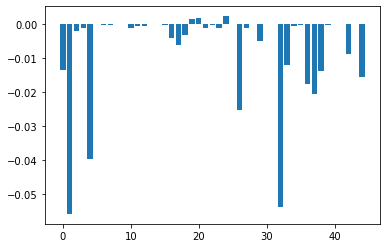

In [218]:
print(X.head(5))
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [219]:
X.head(10)

,ActiveProductAndChannelGroupNum,AvgAtmTrxNumL6M,AvgAutoBillPaymentNumLM6,AvgBranchTrxNumL6M,AvgDemandDepositTrxNumL6M,AvgDemandDepositTrxUsdAmountL6M,AvgFxDemandDepositTrxNumL3M,AvgFxDemandDepositTrxNumL6M,AvgFxDemandDepositTrxUsdAmountL3M,AvgFxDemandDepositTrxUsdAmountL6M,...,SumCcIvrTrxNumL6M,SumDemandDepositTrxNumL3M,SumDemandDepositTrxNumL6M,SumDemandDepositTrxTypeNumLM,SumLoanBalanceUsdLM,SumUsdAum,ValidationFlag,ValueBasedSegment,YearlyIncome,TotalProductOwnership
0,1,0,0,0.28,0.28,0,0,0,0,0,...,0,0.0,0.0,0,0.0,0.0,0,2,0.0,2
1,4,10.57,0.28,0,4.18,1370,0,0,0,0,...,0,2.0,2.0,0,0.0,400.0,0,2,150.0,5
2,2,19.49,0,0.55,15.3,1040,0,0,0,0,...,0,4.0,8.0,6,0.0,0.0,0,2,10.0,4
3,6,6.4,1.12,0,11.97,340,0,0,0,0,...,0,6.0,6.0,6,950.0,0.0,0,2,770.0,8
4,3,10.57,0,0,0.55,150,0,0,0,0,...,0,6.0,6.0,6,910.0,0.0,0,2,850.0,3
5,3,62.63,0,1.12,15.58,2090,0,0,0,0,...,0,4.0,4.0,2,0.0,250.0,0,2,-80.0,4
6,2,0,0,0,2.51,40,0,0,0,0,...,0,2.0,2.0,2,60.0,0.0,0,2,-10.0,3
7,2,18.92,1.67,0,5.1,160,0,0,0,0,...,0,2.0,2.0,2,0.0,10.0,0,2,-60.0,5
8,1,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0,0.0,30.0,0,2,50.0,1
10,7,25.5,1.39,1.12,14.48,1980,0,0,0,0,...,0,6.0,8.0,4,7430.0,70.0,0,2,2130.0,5


In [220]:
first3M = X['SumCcIvrTrxNumL6M'].sub(X['SumCcIvrTrxNumL3M'], axis = 0)
first3M.to_numpy()
indices_increased = first3M > 0
indices_decreased = first3M <= 0
first3M[indices_increased] = 1 
first3M[indices_decreased] = 0
X['IncreaseCcIvrTrxNum'] = first3M
print(X['IncreaseCcIvrTrxNum'].head(50))

corr = X.corr()
corr["ChurnFlag"].sort_values(ascending=False)


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
10    0
11    0
12    0
13    0
16    0
18    0
19    0
20    1
21    0
23    0
24    0
25    0
26    0
27    0
29    0
30    0
32    0
33    0
34    0
38    0
39    0
40    1
41    0
42    0
44    0
45    0
47    0
49    0
50    0
51    0
54    0
55    0
56    0
57    0
58    0
59    0
61    0
63    0
64    0
66    0
68    0
Name: IncreaseCcIvrTrxNum, dtype: int64


ChurnFlag                                      1.000000
ProfitSegment                                  0.119418
ValueBasedSegment                              0.042577
ClosedCreditCardFlag                           0.040596
ClosedPayrollDurationMonthL12M                 0.036551
AvgDemandDepositTrxUsdAmountL6M               -0.001801
ClosedOverdraftDurationMonthL12M              -0.005343
SumUsdAum                                     -0.007413
MaxUsdAumL24M                                 -0.007453
AvgFxDemandDepositTrxUsdAmountL6M             -0.007456
AvgFxDemandDepositTrxUsdAmountL3M             -0.007468
AvgUsdAumL3M                                  -0.008408
AvgUsdAumL6M                                  -0.009405
YearlyIncome                                  -0.010426
ClosedCreditCardDurationMonthL12M             -0.016579
IncreaseCcIvrTrxNum                           -0.020672
BonusCampaignPromiseFlag                      -0.021875
SumCcIvrTrxNumL3M                             -0

array([[<AxesSubplot:xlabel='ChurnFlag', ylabel='ChurnFlag'>,
        <AxesSubplot:xlabel='TotalProductOwnership', ylabel='ChurnFlag'>],
       [<AxesSubplot:xlabel='ChurnFlag', ylabel='TotalProductOwnership'>,
        <AxesSubplot:xlabel='TotalProductOwnership', ylabel='TotalProductOwnership'>]],
      dtype=object)

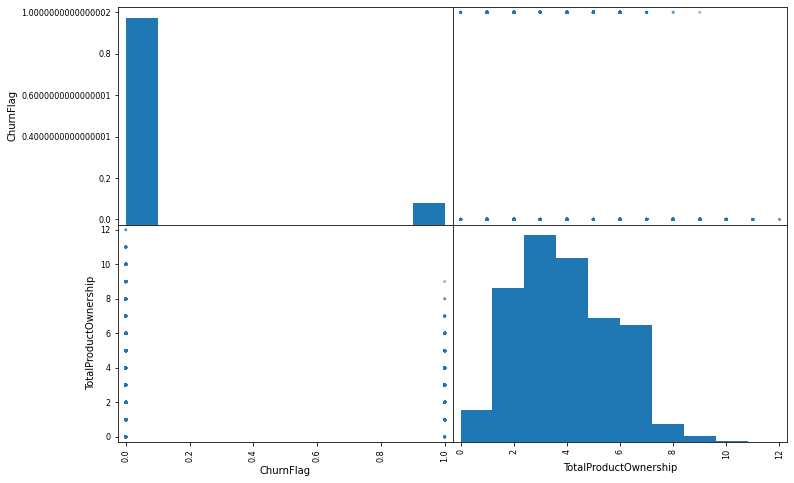

In [221]:
from pandas.plotting import scatter_matrix

scatter_matrix(X[['ChurnFlag', 'TotalProductOwnership']], figsize=(12,8))

In [222]:
sorted_data = X.reindex(sorted(X.columns), axis=1)
sorted_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50872 entries, 0 to 65998
Data columns (total 46 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ActiveProductAndChannelGroupNum              50872 non-null  int64  
 1   AvgAtmTrxNumL6M                              50872 non-null  object 
 2   AvgAutoBillPaymentNumLM6                     50872 non-null  object 
 3   AvgBranchTrxNumL6M                           50872 non-null  object 
 4   AvgDemandDepositTrxNumL6M                    50872 non-null  object 
 5   AvgDemandDepositTrxUsdAmountL6M              50872 non-null  int64  
 6   AvgFxDemandDepositTrxNumL3M                  50872 non-null  object 
 7   AvgFxDemandDepositTrxNumL6M                  50872 non-null  object 
 8   AvgFxDemandDepositTrxUsdAmountL3M            50872 non-null  int64  
 9   AvgFxDemandDepositTrxUsdAmountL6M            50872 non-null  int64  
 10

In [223]:
channelcolumns = sorted_data.iloc[:, 16:19]

In [224]:
channelcolumns

,Channel1OwnershipFlag,Channel2OwnershipFlag,Channel3OwnershipFlag
0,1,0,1
1,0,2,1
2,2,2,1
3,1,2,1
4,0,2,0
...,...,...,...
65994,2,2,1
65995,0,0,0
65996,0,0,1
65997,2,2,1


In [225]:
totalActiveChannelOwnership = channelcolumns.T[channelcolumns.T > 1].count()
totalActiveChannelOwnership

0        0
1        1
2        2
3        1
4        1
        ..
65994    2
65995    0
65996    0
65997    2
65998    0
Length: 50872, dtype: int64

In [226]:
X['TotalActiveChannelOwnership'] = totalActiveChannelOwnership

In [227]:
corr = X.corr()
corr["ChurnFlag"].sort_values(ascending=False)
churn = X.loc[X['ChurnFlag'] == 1]
print(churn.shape)

(4756, 47)


In [228]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import numpy as np

target = X['ChurnFlag']
target = target.to_numpy()
target = target.reshape(-1, 1)

values = X.drop(['ChurnFlag'],axis=1)
scaler = StandardScaler()
scaled = scaler.fit_transform(values)
inputs = pd.DataFrame(scaled)


X_train, X_test, y_train, y_test = train_test_split( inputs, target, test_size=0.3, random_state=42)

regressor = LogisticRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(confusion_matrix(y_test, y_pred))


D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[13802    27]
 [ 1418    15]]


D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [229]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.02033898305084746

In [230]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(13802, 27, 1418, 15)

In [231]:
churnfalsefirst10k = X.loc[X['ChurnFlag'] == 0].loc[:20000,]
print(churnfalsefirst10k.shape)
churntrue = X.loc[X['ChurnFlag'] == 1]
print(churntrue.shape)


(14079, 47)
(4756, 47)


In [232]:
frames = [churnfalsefirst10k, churntrue]
result = pd.concat(frames)
print(result.shape)

(18835, 47)


In [233]:
target = result['ChurnFlag']
target = target.to_numpy()
target = target.reshape(-1, 1)

values = result.drop(['ChurnFlag'],axis=1)
scaler = StandardScaler()
scaled = scaler.fit_transform(values)
inputs = pd.DataFrame(scaled)

X_train, X_test, y_train, y_test = train_test_split( inputs, target, test_size=0.3, random_state=42)

regressor = LogisticRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(confusion_matrix(y_test, y_pred))
f1_score(y_test, y_pred)

[[3879  363]
 [ 885  524]]


D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.45644599303135885

In [234]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=values.columns).sort_values(ascending=False)
feature_imp


<ipython-input-234-92d74f7c0f46>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


SumUsdAum                                      0.084358
YearlyIncome                                   0.071236
AvgDemandDepositTrxNumL6M                      0.056441
ActiveProductAndChannelGroupNum                0.054434
AvgDemandDepositTrxUsdAmountL6M                0.052924
AvgAtmTrxNumL6M                                0.047921
DemandDepositBalanceDebtRatioLM6               0.047017
MaxUsdAumL24M                                  0.043845
TotalProductOwnership                          0.040410
MaxLoanBalanceL24M                             0.040140
SumDemandDepositTrxTypeNumLM                   0.039791
SumLoanBalanceUsdLM                            0.036912
AvgUsdAumL3M                                   0.035766
MaxLoanRemainingMaturity                       0.035705
AvgUsdAumL6M                                   0.033856
SumDemandDepositTrxNumL3M                      0.027069
SumDemandDepositTrxNumL6M                      0.026788
Channel2OwnershipFlag                          0

In [235]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

<ipython-input-235-e927cbacf549>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


Accuracy: 0.8405591930631746


In [236]:
print(confusion_matrix(y_test, y_pred))

[[3943  299]
 [ 602  807]]


In [237]:
f1_score(y_test, y_pred)

0.6417495029821074

In [181]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [182]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.5min finished
D:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [183]:
best_random = rf_random.best_estimator_
y_pred = best_random.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
f1score = f1_score(y_test, y_pred)


[[3959  283]
 [ 606  803]]
Accuracy: 0.8426827110245975


In [186]:
f1score

0.643687374749499

In [238]:
best_random

RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=1000)

In [184]:
validation = df12.loc[df12['ValidationFlag'] == 1]
validation.shape

(11000, 84)

In [185]:
X['ValidationFlag']

0        0
1        0
2        0
3        0
4        0
        ..
65994    0
65995    0
65996    0
65997    0
65998    0
Name: ValidationFlag, Length: 50872, dtype: int64